In [1]:
from import_RNA import *

scanpy==1.8.2 anndata==0.8.0 umap==0.5.2 numpy==1.18.1 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.11 pynndescent==0.5.6


# Figure 1 plots

## Read in fully annotated datasets

In [1]:
P12 = sc.read_h5ad('h5ads_cmprsd/P12Sham_gaba_v2.h5ad').concatenate(sc.read_h5ad('h5ads_cmprsd/P12Sham_glut_v2.h5ad'),
                                                            batch_categories=['GABAergic', 'Glutamatergic'],
                                                            batch_key='Class')

In [2]:
P22 = sc.read_h5ad('h5ads_cmprsd/P22Sham_gaba_v2.h5ad').concatenate(sc.read_h5ad('h5ads_cmprsd/P22Sham_glut_v2.h5ad'),
                                                            batch_categories=['GABAergic', 'Glutamatergic'],
                                                            batch_key='Class')

In [3]:
oneWD = sc.read_h5ad('h5ads_cmprsd/P22-1dWD_gaba_v2.h5ad').concatenate(sc.read_h5ad('h5ads_cmprsd/P22-1dWD_glut_v2.h5ad'),
                                                            batch_categories=['GABAergic', 'Glutamatergic'],
                                                            batch_key='Class')

In [4]:
tenWD = sc.read_h5ad('h5ads_cmprsd/P22-10dWD_gaba_v2.h5ad').concatenate(sc.read_h5ad('h5ads_cmprsd/P22-10dWD_glut_v2.h5ad'),
                                                            batch_categories=['GABAergic', 'Glutamatergic'],
                                                            batch_key='Class')

In [5]:
adata = P12.concatenate(P22, oneWD, tenWD, batch_categories=['P12', 'P22', 'P22-1dWD', 'P22-10dWD'],
               batch_key='Condition')

In [6]:
adata.X = adata.raw.X
pipeline_short(adata, batch_correct=False, batch_ID=None)
adata.X = adata.raw.X

In [8]:
adata.write_h5ad('h5ads_cmprsd/Figure1.h5ad')

In [9]:
adata.shape

(81462, 21258)

In [3]:
adata = sc.read_h5ad('h5ads_cmprsd/Figure1.h5ad')

In [6]:
adata.X.A

array([[2.9455636 , 1.0523171 , 0.48330653, ..., 0.        , 0.        ,
        2.3342197 ],
       [3.3840523 , 1.1876001 , 1.4858689 , ..., 0.        , 0.        ,
        2.8305283 ],
       [2.8210187 , 0.7952159 , 1.7680944 , ..., 0.        , 0.        ,
        1.7680944 ],
       ...,
       [2.925453  , 0.51793873, 0.51793873, ..., 0.        , 0.        ,
        2.5812886 ],
       [2.2232423 , 0.36014587, 0.        , ..., 0.        , 0.        ,
        2.071487  ],
       [2.8186758 , 0.71799093, 0.        , ..., 0.        , 0.        ,
        2.8186758 ]], dtype=float32)

In [8]:
adata.layers

Layers with keys: 

In [9]:
adata.obs.columns

Index(['Doublet', 'Doublet Score', 'Sample', 'n_genes_by_counts',
       'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden',
       'Doublet?', 'V1 Mapping Prob', 'V1 Mapping Label', 'leiden_1.5',
       'V1 Mapping Label_maj', 'batch', 'Subclass', 'leiden_0.25',
       'leiden_0.5', 'leiden_0.7', 'leiden_0.8', 'leiden_0.9', 'leiden_1',
       'leiden_1.25', 'leiden_1.75', 'leiden_2', 'P12 Mapping Prob',
       'P12 Mapping Label', 'leiden_0.2', 'leiden_0.3', 'leiden_0.4', 'Type',
       'leiden_0.15', 'Class', 'P21 Mapping Prob', 'P21 Mapping Label',
       'leiden_0.35', 'leiden_0.34', 'leiden_0.33', 'leiden_0.32',
       'leiden_0.31', 'leiden_0.45', 'leiden_0.75', 'leiden_0.6', 'Condition'],
      dtype='object')

## Make plots

### UMAPs

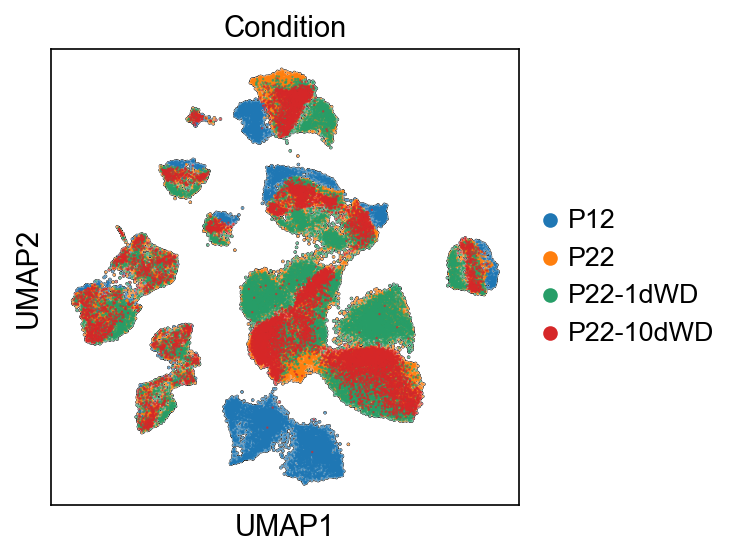

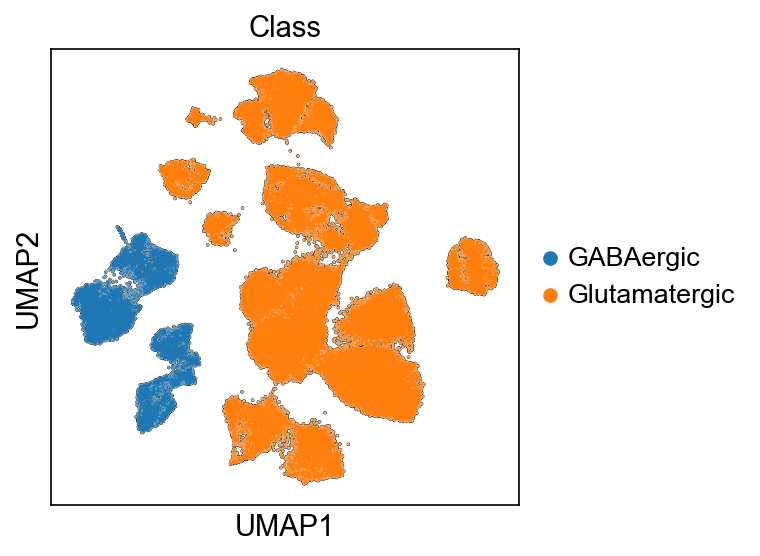

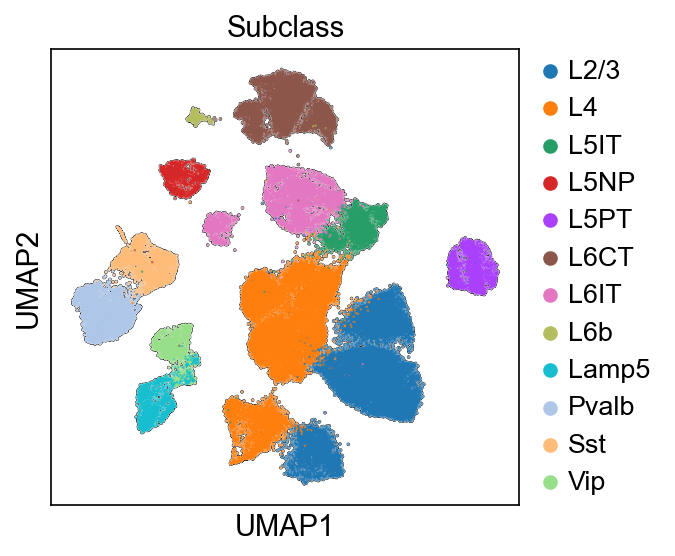

In [14]:
sc.pl.umap(adata, color=['Condition'], add_outline=True,outline_width=(0.2,0.05), s=5)
sc.pl.umap(adata, color=['Class',], add_outline=True,outline_width=(0.2,0.05), s=5)
sc.pl.umap(adata, color=['Subclass'], add_outline=True,outline_width=(0.2,0.05), s=5)

In [3]:
P22.X

<33222x21258 sparse matrix of type '<class 'numpy.float32'>'
	with 90144854 stored elements in Compressed Sparse Row format>

In [4]:
P22.X = P22.raw.X
pipeline_short(P22, batch_correct=True, batch_ID='Sample')
P22.X = P22.raw.X

	Initialization is completed.
	Completed 1 / 10 iteration(s).
	Completed 2 / 10 iteration(s).
	Completed 3 / 10 iteration(s).
	Completed 4 / 10 iteration(s).
	Completed 5 / 10 iteration(s).
	Completed 6 / 10 iteration(s).
	Completed 7 / 10 iteration(s).
Reach convergence after 7 iteration(s).


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [5]:
sc.tl.umap(P22)

/Users/salwanbutrus/opt/anaconda3/envs/xgb_env/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


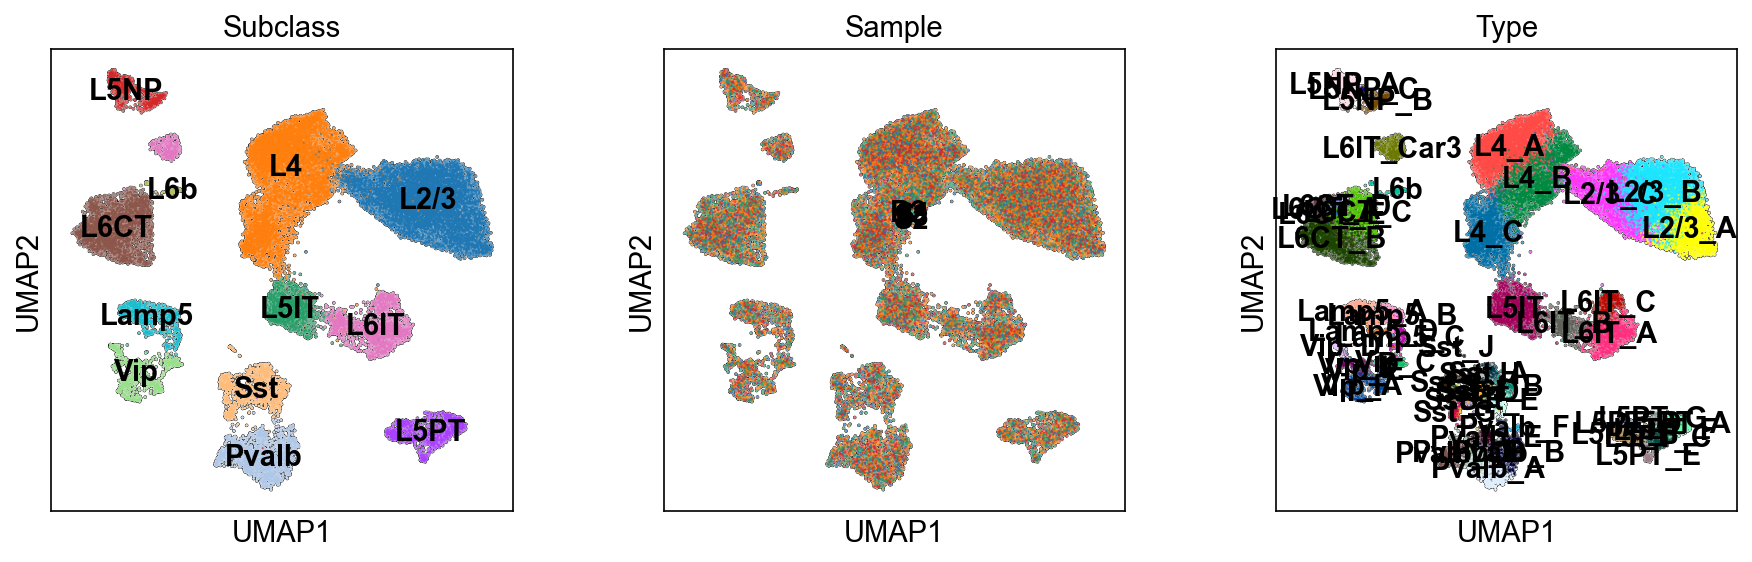

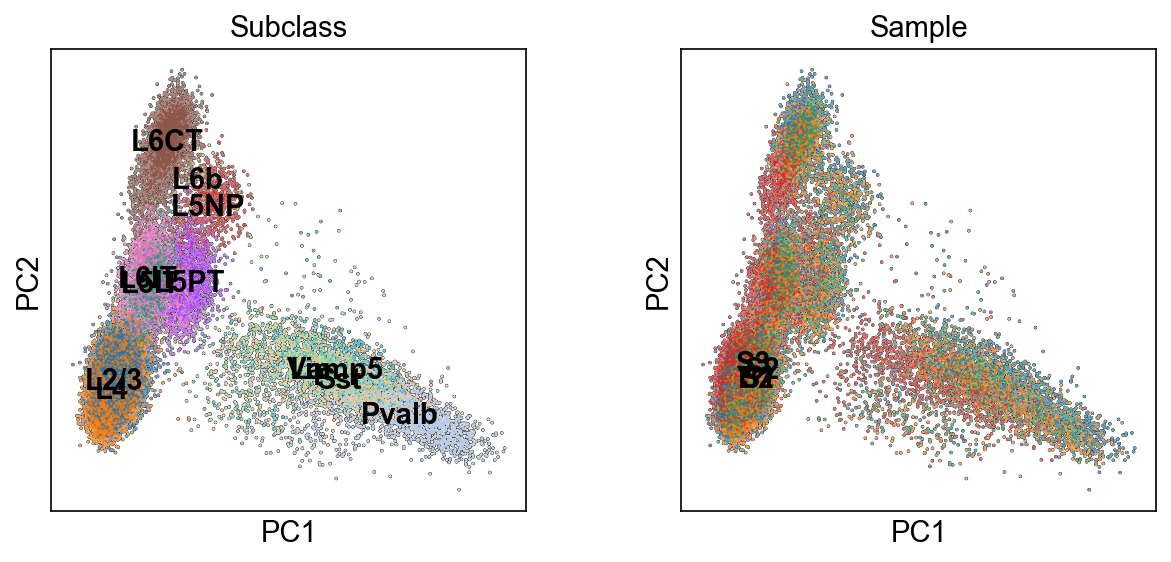

In [16]:
sc.pl.umap(shuffle(P22), color=['Subclass','Sample', 'Type'], add_outline=True,outline_width=(0.2,0.05), s=5,
          legend_loc='on data')
sc.pl.pca(shuffle(P22), color=['Subclass','Sample'], add_outline=True,outline_width=(0.2,0.05), s=5,
          legend_loc='on data')

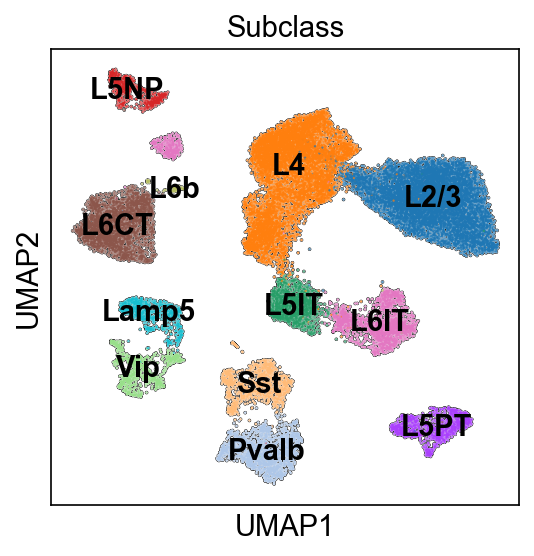

In [25]:
sc.pl.umap(shuffle(P22), color=['Subclass'], add_outline=True,outline_width=(0.2,0.05), s=5, save='Fig1_P22_umap.pdf',
          legend_loc='on data')

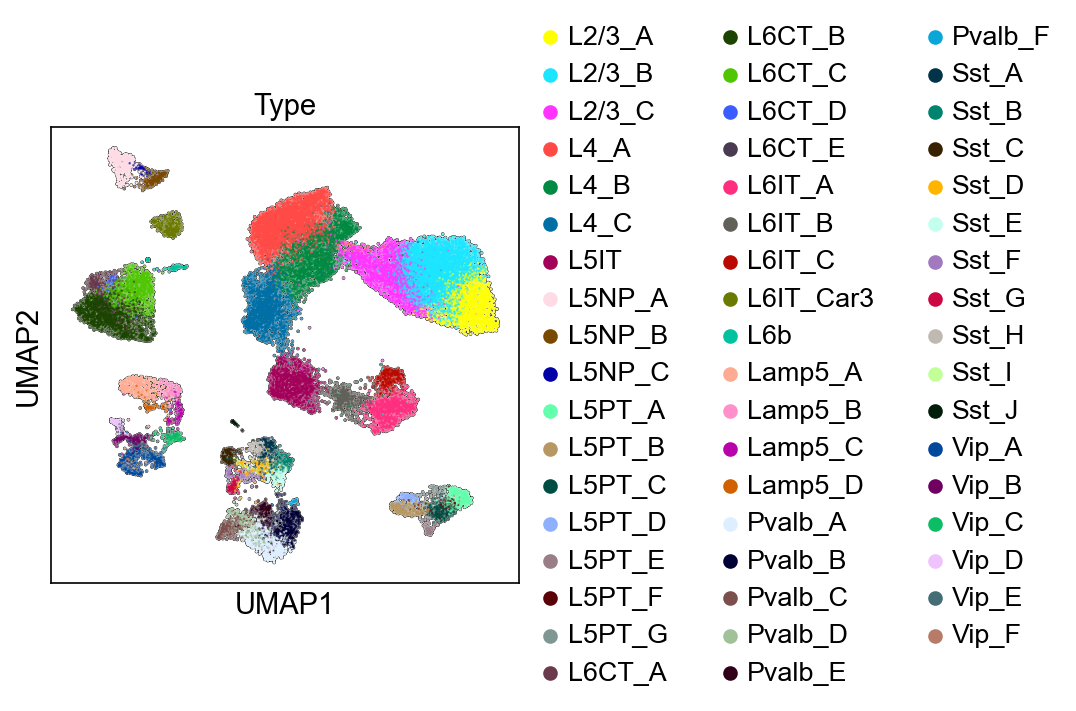

In [23]:
sc.pl.umap(shuffle(P22), color=['Type'], add_outline=True,outline_width=(0.2,0.05), s=5, )

In [17]:
P12.X = P12.raw.X
pipeline_short(P12, batch_correct=True, batch_ID='Sample')
P12.X = P12.raw.X

	Initialization is completed.
	Completed 1 / 10 iteration(s).
	Completed 2 / 10 iteration(s).
	Completed 3 / 10 iteration(s).
	Completed 4 / 10 iteration(s).
Reach convergence after 4 iteration(s).


/Users/salwanbutrus/opt/anaconda3/envs/xgb_env/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


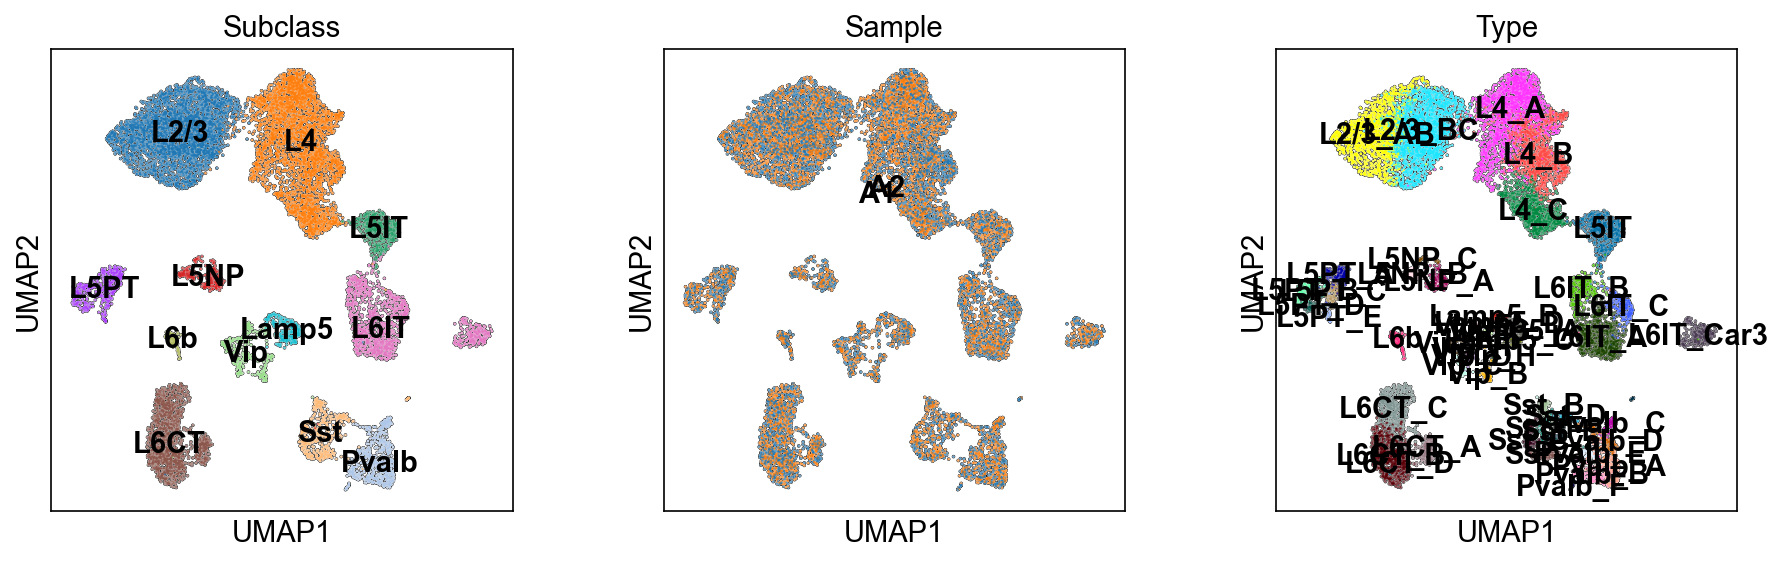

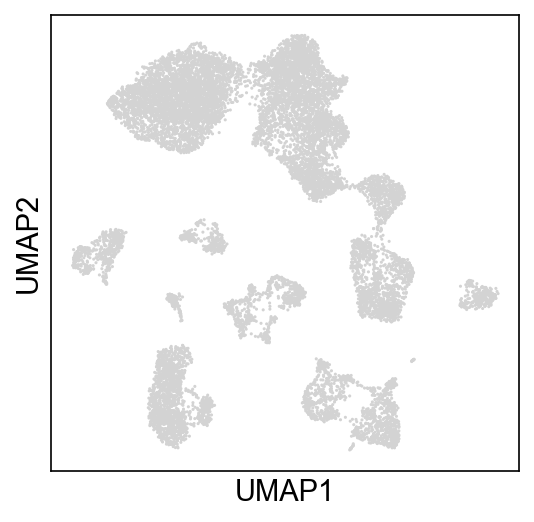

In [18]:
sc.pl.umap(shuffle(P12), color=['Subclass','Sample', 'Type'], add_outline=True,outline_width=(0.2,0.05), s=5,
          legend_loc='on data')
sc.pl.umap(P12)

	Initialization is completed.
	Completed 1 / 10 iteration(s).
	Completed 2 / 10 iteration(s).
	Completed 3 / 10 iteration(s).
	Completed 4 / 10 iteration(s).
	Completed 5 / 10 iteration(s).
	Completed 6 / 10 iteration(s).
	Completed 7 / 10 iteration(s).
	Completed 8 / 10 iteration(s).
Reach convergence after 8 iteration(s).


/Users/salwanbutrus/opt/anaconda3/envs/xgb_env/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


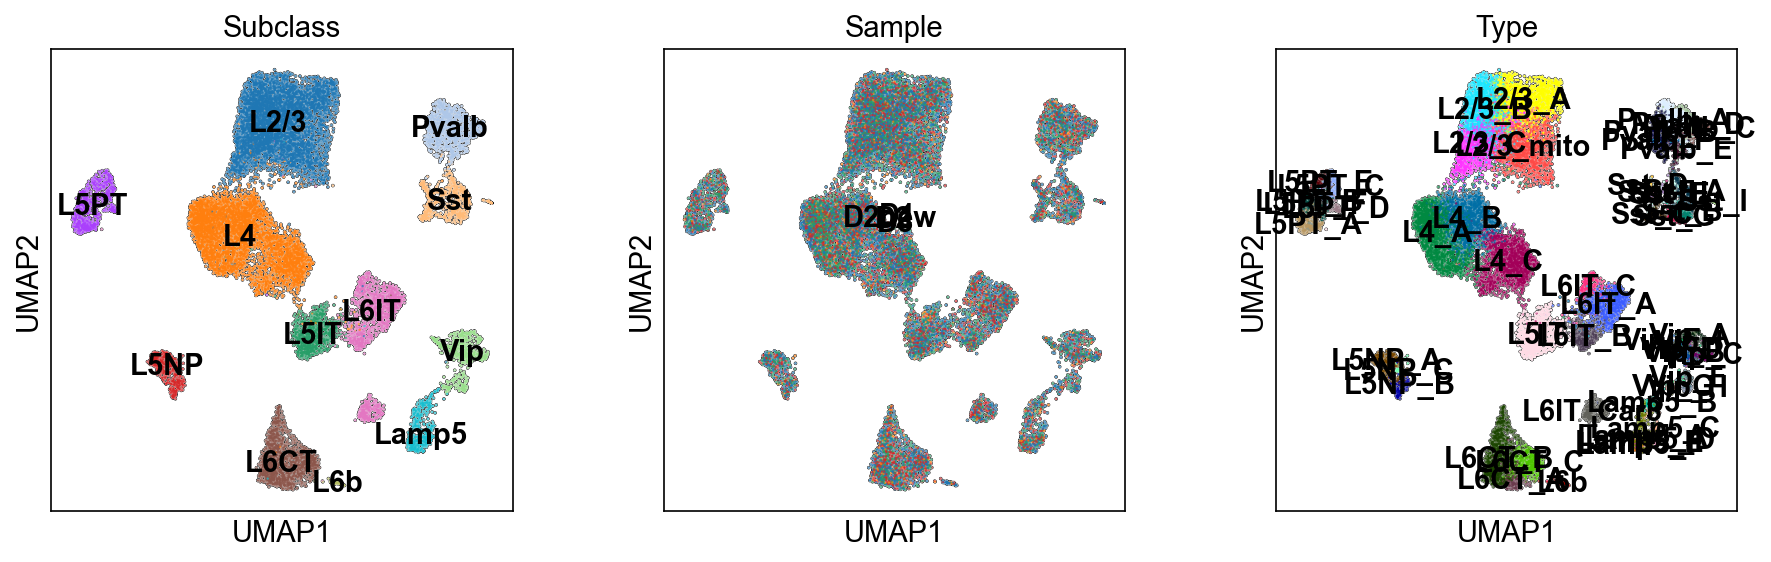

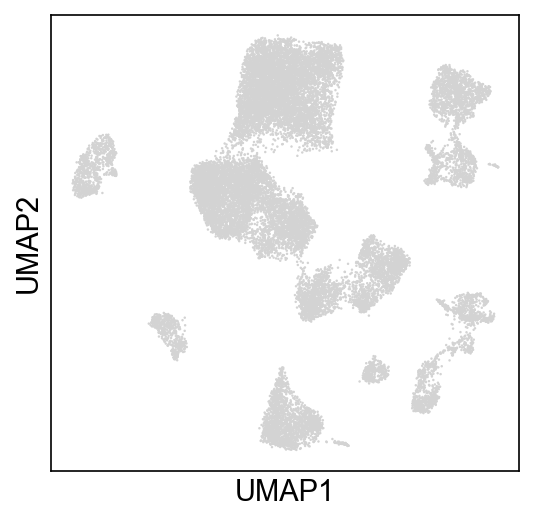

In [20]:
oneWD.X = oneWD.raw.X
pipeline_short(oneWD, batch_correct=True, batch_ID='Sample')
oneWD.X = oneWD.raw.X

sc.pl.umap(shuffle(oneWD), color=['Subclass','Sample', 'Type'], add_outline=True,outline_width=(0.2,0.05), s=5,
          legend_loc='on data')
sc.pl.umap(oneWD)

	Initialization is completed.
	Completed 1 / 10 iteration(s).
	Completed 2 / 10 iteration(s).
	Completed 3 / 10 iteration(s).
	Completed 4 / 10 iteration(s).
	Completed 5 / 10 iteration(s).
Reach convergence after 5 iteration(s).


/Users/salwanbutrus/opt/anaconda3/envs/xgb_env/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


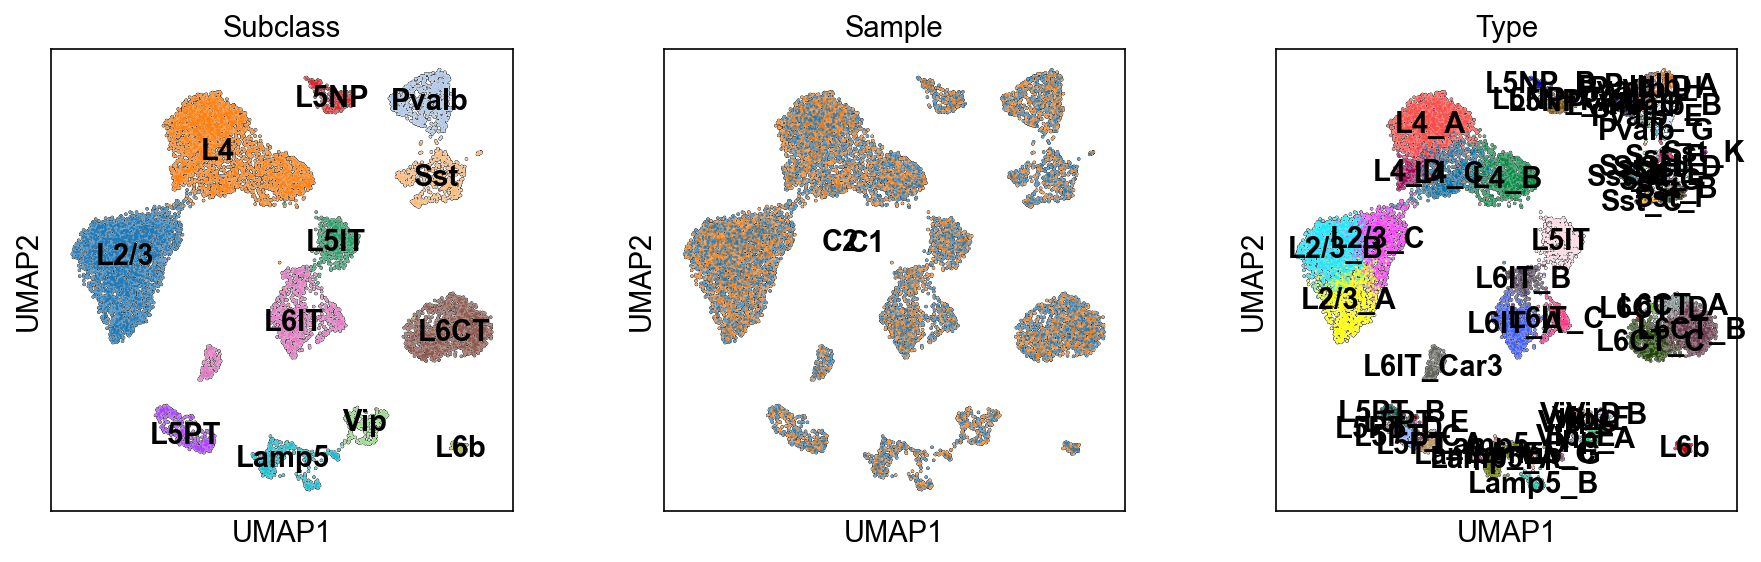

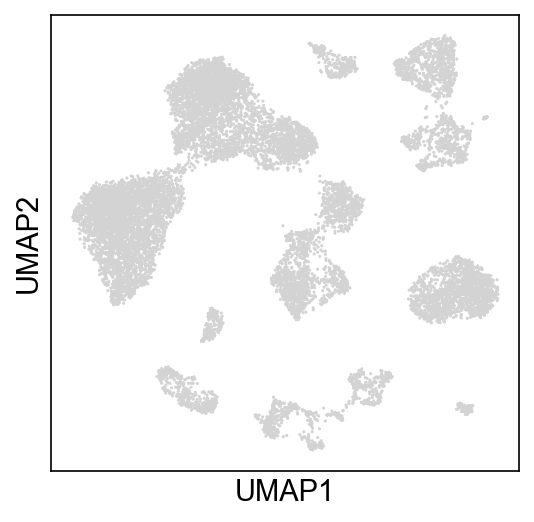

In [22]:
tenWD.X = tenWD.raw.X
pipeline_short(tenWD, batch_correct=True, batch_ID='Sample')
tenWD.X = tenWD.raw.X

sc.pl.umap(shuffle(tenWD), color=['Subclass','Sample', 'Type'], add_outline=True,outline_width=(0.2,0.05), s=5,
          legend_loc='on data')
sc.pl.umap(tenWD)

### Fig S1 sample freqs

In [4]:
master_freqs = []
master_subs = []
master_cond = []

for s in adata.obs['Subclass'].values.categories:
    for i in adata.obs['Condition'].values.categories:
        master_freqs.append(adata[adata.obs.Condition==i,:].obs.Subclass.value_counts(normalize=True)[s])
        master_subs.append(s)
        master_cond.append(i)

In [5]:
a = pd.DataFrame(master_subs)

a['Subclass'] = master_subs
a['Condition'] = master_cond
a['Frequency'] = master_freqs

In [6]:
a

0 Subclass  Condition  Frequency
0    L2/3     L2/3        P12   0.268296
1    L2/3     L2/3        P22   0.291403
2    L2/3     L2/3   P22-1dWD   0.311545
3    L2/3     L2/3  P22-10dWD   0.272308
4      L4       L4        P12   0.287202
5      L4       L4        P22   0.280085
6      L4       L4   P22-1dWD   0.270732
7      L4       L4  P22-10dWD   0.268682
8    L5IT     L5IT        P12   0.036703
9    L5IT     L5IT        P22   0.045783
10   L5IT     L5IT   P22-1dWD   0.046962
11   L5IT     L5IT  P22-10dWD   0.041028
12   L5NP     L5NP        P12   0.019275
13   L5NP     L5NP        P22   0.021341
14   L5NP     L5NP   P22-1dWD   0.022736
15   L5NP     L5NP  P22-10dWD   0.020023
16   L5PT     L5PT        P12   0.034340
17   L5PT     L5PT        P22   0.037987
18   L5PT     L5PT   P22-1dWD   0.038809
19   L5PT     L5PT  P22-10dWD   0.030903
20   L6CT     L6CT        P12   0.111513
21   L6CT     L6CT        P22   0.099663
22   L6CT     L6CT   P22-1dWD   0.080647
23   L6CT     L6CT  P22-10dWD   0.115678
24   L6IT     L6IT        P12   0.102947
25   L6IT     L6IT        P22   0.073566
26   L6IT     L6IT   P22-1dWD   0.077851
27   L6IT     L6IT  P22-10dWD   0.091953
28    L6b      L6b        P12   0.008123
29    L6b      L6b        P22   0.003040
30    L6b      L6b   P22-1dWD   0.002702
31    L6b      L6b  P22-10dWD   0.007027
32  Lamp5    Lamp5        P12   0.018832
33  Lamp5    Lamp5        P22   0.024231
34  Lamp5    Lamp5   P22-1dWD   0.024040
35  Lamp5    Lamp5  P22-10dWD   0.032490
36  Pvalb    Pvalb        P12   0.049922
37  Pvalb    Pvalb        P22   0.056770
38  Pvalb    Pvalb   P22-1dWD   0.057072
39  Pvalb    Pvalb  P22-10dWD   0.056517
40    Sst      Sst        P12   0.036334
41    Sst      Sst        P22   0.038408
42    Sst      Sst   P22-1dWD   0.036992
43    Sst      Sst  P22-10dWD   0.043748
44    Vip      Vip        P12   0.026512
45    Vip      Vip        P22   0.027723
46    Vip      Vip   P22-1dWD   0.029911
47    Vip      Vip  P22-10dWD   0.019645

In [7]:
adata.obs.Condition.value_counts()

P22          33222
P22-1dWD     21464
P12          13541
P22-10dWD    13235
Name: Condition, dtype: int64

In [8]:
a['Condition'] = pd.Categorical(a['Condition']).rename_categories(['P12 (13,541 Cells; 2 samples)', 
                                                  'P22 (33,222 Cells; 4 samples)', 
                                                  'P22-10dWD (13,235 Cells; 2 samples)', 
                                                  'P22-1dWD (21,464 Cells; 4 samples)'])

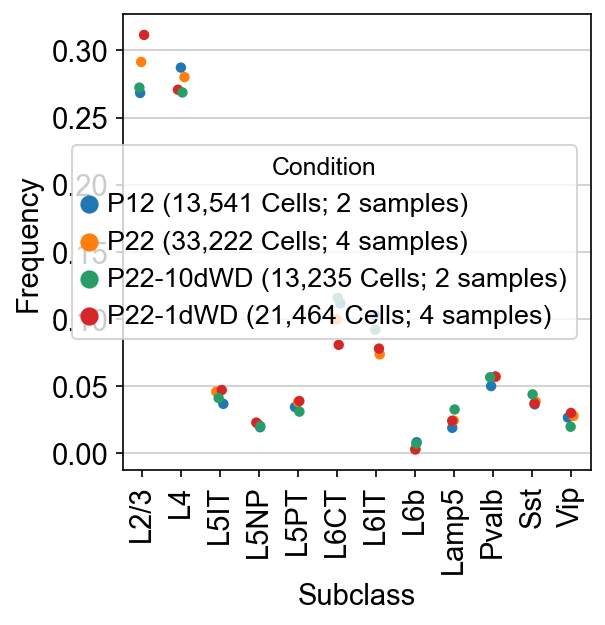

In [53]:
sn.stripplot(data=a,x='Subclass', y='Frequency', hue='Condition', )
plt.xticks(rotation=90)
# plt.yscale('log')
plt.show()

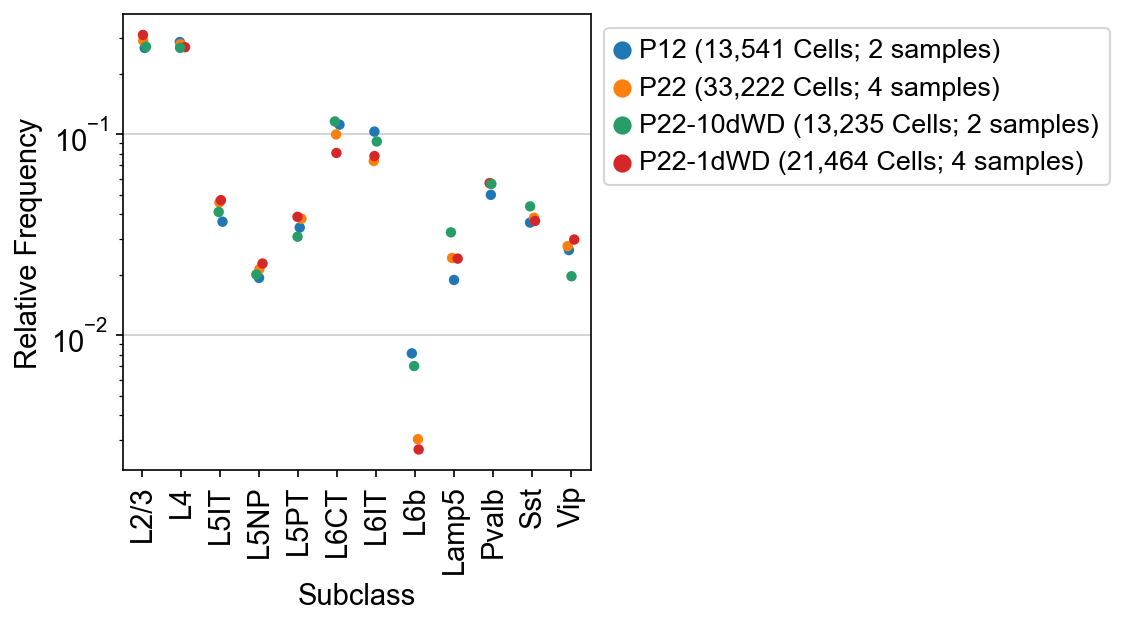

In [57]:
sn.stripplot(data=a,x='Subclass', y='Frequency', hue='Condition', )
plt.xticks(rotation=90)
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.0, 1),)
plt.ylabel('Relative Frequency')
plt.savefig('figures/Fig1_freq.pdf',  bbox_inches = 'tight')

In [9]:
grouped_df = df.groupby('Subclass')

# Define a function to divide each frequency by its max value within the subclass
def normalize_frequencies(subgroup):
    max_freq = subgroup['Frequency'].max()
    subgroup['Normalized_Frequency'] = subgroup['Frequency'] / max_freq
    return subgroup

# Apply the function to each group
normalized_df = grouped_df.apply(normalize_frequencies)

# Drop the original 'Frequency' column if you don't need it anymore
normalized_df = normalized_df.drop('Frequency', axis=1)

# Print the result
print(normalized_df)

NameError: name 'df' is not defined

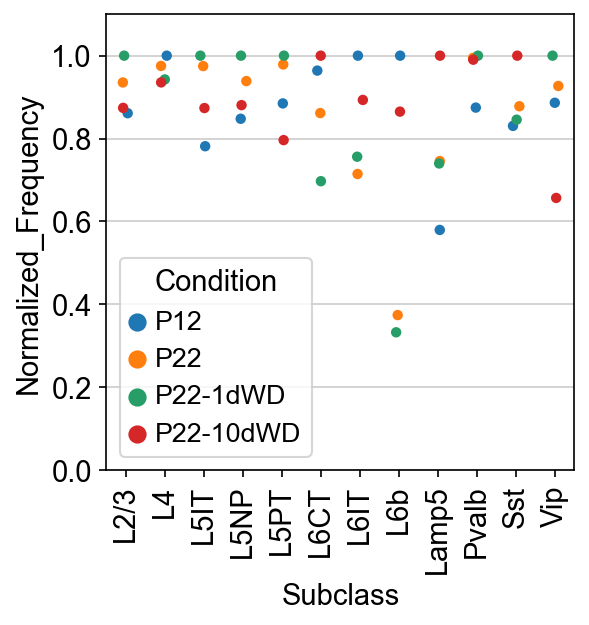

In [70]:
sn.stripplot(data=normalized_df,x='Subclass', y='Normalized_Frequency', hue='Condition', )
plt.xticks(rotation=90)
# plt.yscale('log')
plt.ylim([0,1.1])
plt.show()

#### Fig1

In [10]:
adata.obs['Sample'].values.categories

Index(['A1', 'A2', 'B2', 'C1', 'C2', 'D1', 'D2', 'D2new', 'D3', 'S1', 'S2',
       'S3'],
      dtype='object')

In [11]:
adata.obs['Sample'] = adata.obs['Sample'].cat.rename_categories(['A1', 'A2', 'S4', 'C1', 'C2', 'D1', 'D2', 
                                                                           'D4', 'D3', 'S1', 'S2','S3'])

In [12]:
master_freqs = []
master_subs = []
master_cond = []

for s in adata.obs['Subclass'].values.categories:
    for i in adata.obs['Sample'].values.categories:
        master_freqs.append(adata[adata.obs.Sample==i,:].obs.Subclass.value_counts(normalize=True)[s])
        master_subs.append(s)
        master_cond.append(i)

In [13]:
a = pd.DataFrame(master_subs)

a['Subclass'] = master_subs
a['Sample'] = master_cond
a['Frequency'] = master_freqs

In [14]:
a

0 Subclass Sample  Frequency
0    L2/3     L2/3     A1   0.280357
1    L2/3     L2/3     A2   0.257143
2    L2/3     L2/3     S4   0.285178
3    L2/3     L2/3     C1   0.259496
4    L2/3     L2/3     C2   0.285604
..    ...      ...    ...        ...
139   Vip      Vip     D4   0.030709
140   Vip      Vip     D3   0.027682
141   Vip      Vip     S1   0.029045
142   Vip      Vip     S2   0.030212
143   Vip      Vip     S3   0.024359

[144 rows x 4 columns]

In [15]:
adata.obs.Condition.value_counts()

P22          33222
P22-1dWD     21464
P12          13541
P22-10dWD    13235
Name: Condition, dtype: int64

In [16]:
a['Condition'] = pd.Categorical(a['Condition']).rename_categories(['P12 (13,541 Cells)', 
                                                  'P22 (33,222 Cells)', 
                                                  'P22 10d AWD (13,235 Cells)', 
                                                  'P22 1d RWD (21,464 Cells)'])

KeyError: 'Condition'

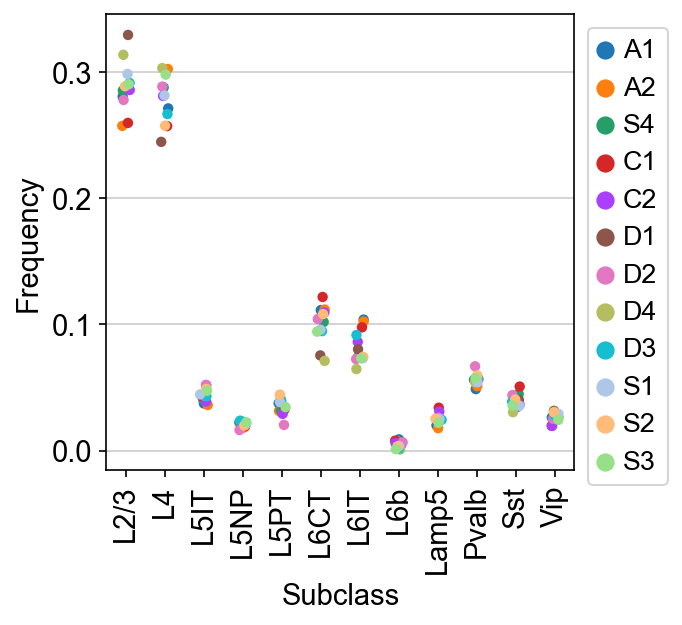

In [17]:
sn.stripplot(data=a,x='Subclass', y='Frequency', hue='Sample', )
plt.xticks(rotation=90)
# plt.yscale('log')
plt.legend(bbox_to_anchor=(1.0, 1),)

plt.show()

In [18]:
pd.Categorical(a['Subclass']).categories

Index(['L2/3', 'L4', 'L5IT', 'L5NP', 'L5PT', 'L6CT', 'L6IT', 'L6b', 'Lamp5',
       'Pvalb', 'Sst', 'Vip'],
      dtype='object')

In [19]:
a['Subclass']

0      L2/3
1      L2/3
2      L2/3
3      L2/3
4      L2/3
       ... 
139     Vip
140     Vip
141     Vip
142     Vip
143     Vip
Name: Subclass, Length: 144, dtype: object

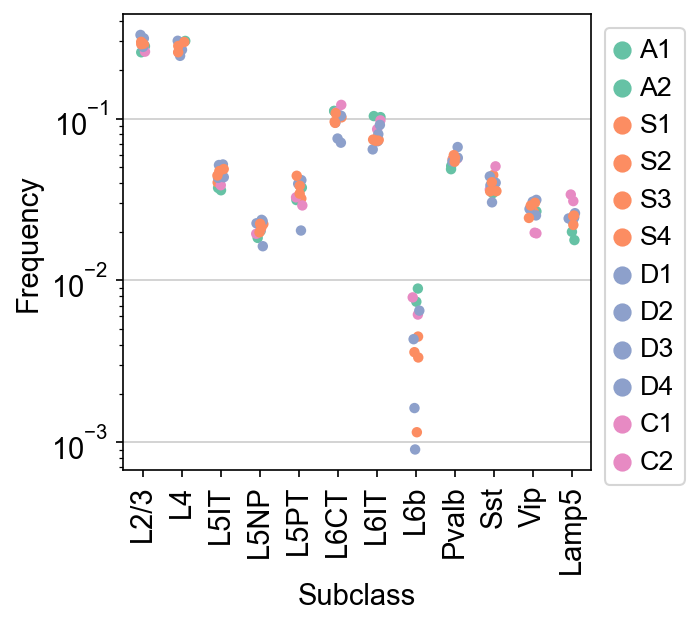

In [21]:
sn.stripplot(data=a,x='Subclass', y='Frequency', hue='Sample', order= ['L2/3', 'L4', 'L5IT', 'L5NP', 'L5PT', 'L6CT', 'L6IT', 'L6b',
       'Pvalb', 'Sst', 'Vip',  'Lamp5',], hue_order=['A1', 'A2', 'S1', 'S2', 'S3', 'S4', 'D1', 'D2', 'D3', 'D4', 'C1', 'C2'],
            palette = ['#66C2A5', '#66C2A5', '#FC8D62','#FC8D62','#FC8D62','#FC8D62', '#8DA0CB','#8DA0CB','#8DA0CB','#8DA0CB', 
                      '#E78AC3', '#E78AC3'])
plt.xticks(rotation=90)
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.0, 1),)
plt.savefig('figures/Fig1F.pdf',   bbox_inches = 'tight')
plt.show()

In [63]:
df =a

In [64]:
grouped_df = df.groupby('Subclass')

# Define a function to divide each frequency by its max value within the subclass
def normalize_frequencies(subgroup):
    max_freq = subgroup['Frequency'].max()
    subgroup['Normalized_Frequency'] = subgroup['Frequency'] / max_freq
    return subgroup

# Apply the function to each group
normalized_df = grouped_df.apply(normalize_frequencies)

# Drop the original 'Frequency' column if you don't need it anymore
normalized_df = normalized_df.drop('Frequency', axis=1)

# Print the result
print(normalized_df)

        0 Subclass  Condition  Normalized_Frequency
0    L2/3     L2/3        P12              0.861180
1    L2/3     L2/3        P22              0.935349
2    L2/3     L2/3   P22-1dWD              1.000000
3    L2/3     L2/3  P22-10dWD              0.874058
4      L4       L4        P12              1.000000
5      L4       L4        P22              0.975222
6      L4       L4   P22-1dWD              0.942656
7      L4       L4  P22-10dWD              0.935515
8    L5IT     L5IT        P12              0.781548
9    L5IT     L5IT        P22              0.974885
10   L5IT     L5IT   P22-1dWD              1.000000
11   L5IT     L5IT  P22-10dWD              0.873627
12   L5NP     L5NP        P12              0.847775
13   L5NP     L5NP        P22              0.938666
14   L5NP     L5NP   P22-1dWD              1.000000
15   L5NP     L5NP  P22-10dWD              0.880669
16   L5PT     L5PT        P12              0.884846
17   L5PT     L5PT        P22              0.978812
18   L5PT   

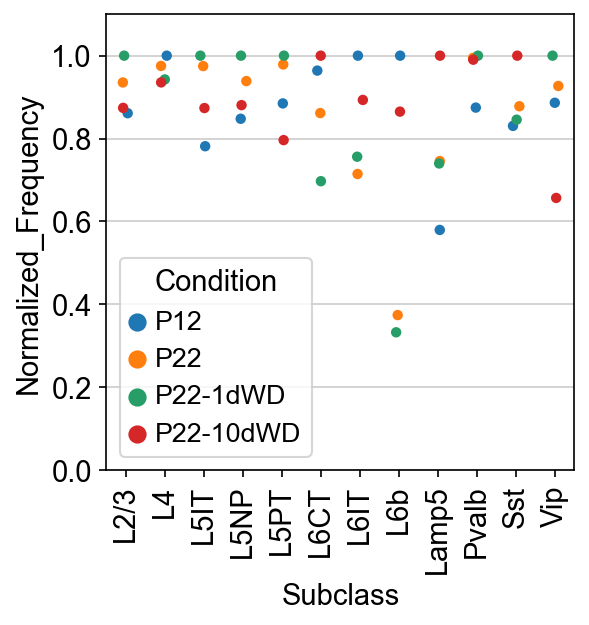

In [70]:
sn.stripplot(data=normalized_df,x='Subclass', y='Normalized_Frequency', hue='Condition', )
plt.xticks(rotation=90)
# plt.yscale('log')
plt.ylim([0,1.1])
plt.show()

### Subclass markers plots

In [11]:
adata.X.A

array([[2.9455636 , 1.0523171 , 0.48330653, ..., 0.        , 0.        ,
        2.3342197 ],
       [3.3840523 , 1.1876001 , 1.4858689 , ..., 0.        , 0.        ,
        2.8305283 ],
       [2.8210187 , 0.7952159 , 1.7680944 , ..., 0.        , 0.        ,
        1.7680944 ],
       ...,
       [2.925453  , 0.51793873, 0.51793873, ..., 0.        , 0.        ,
        2.5812886 ],
       [2.2232423 , 0.36014587, 0.        , ..., 0.        , 0.        ,
        2.071487  ],
       [2.8186758 , 0.71799093, 0.        , ..., 0.        , 0.        ,
        2.8186758 ]], dtype=float32)

In [12]:
adata.obs.Subclass.values.categories

Index(['L2/3', 'L4', 'L5IT', 'L5NP', 'L5PT', 'L6CT', 'L6IT', 'L6b', 'Lamp5',
       'Pvalb', 'Sst', 'Vip'],
      dtype='object')

In [13]:
sub_markers = []
for i in adata.obs.Subclass.values.categories:
    sub_markers.append(DE(adata=adata, 
                               obs_id='Subclass', obs_id_test=i,ref='rest', pts_thresh=0.2, lf_thresh=1))
marks = []
for i in sub_markers:
    marks = marks + list(i.index[0:10])

cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level


glut_sub_markers = []
for i in ['L2/3', 'L4', 'L5IT', 'L5NP', 'L5PT', 'L6CT', 'L6IT', 'L6b']:
    glut_sub_markers.append(DE(adata=adata[adata.obs.Class=='Glutamatergic'], 
                               obs_id='Subclass', obs_id_test=i,ref='rest', pts_thresh=0.2, lf_thresh=1))
glut_marks = []
for i in glut_sub_markers:
    glut_marks = glut_marks + list(i.index[0:10])

In [15]:
marks = []
for i in sub_markers:
    marks = marks + list(i.index[0:3])

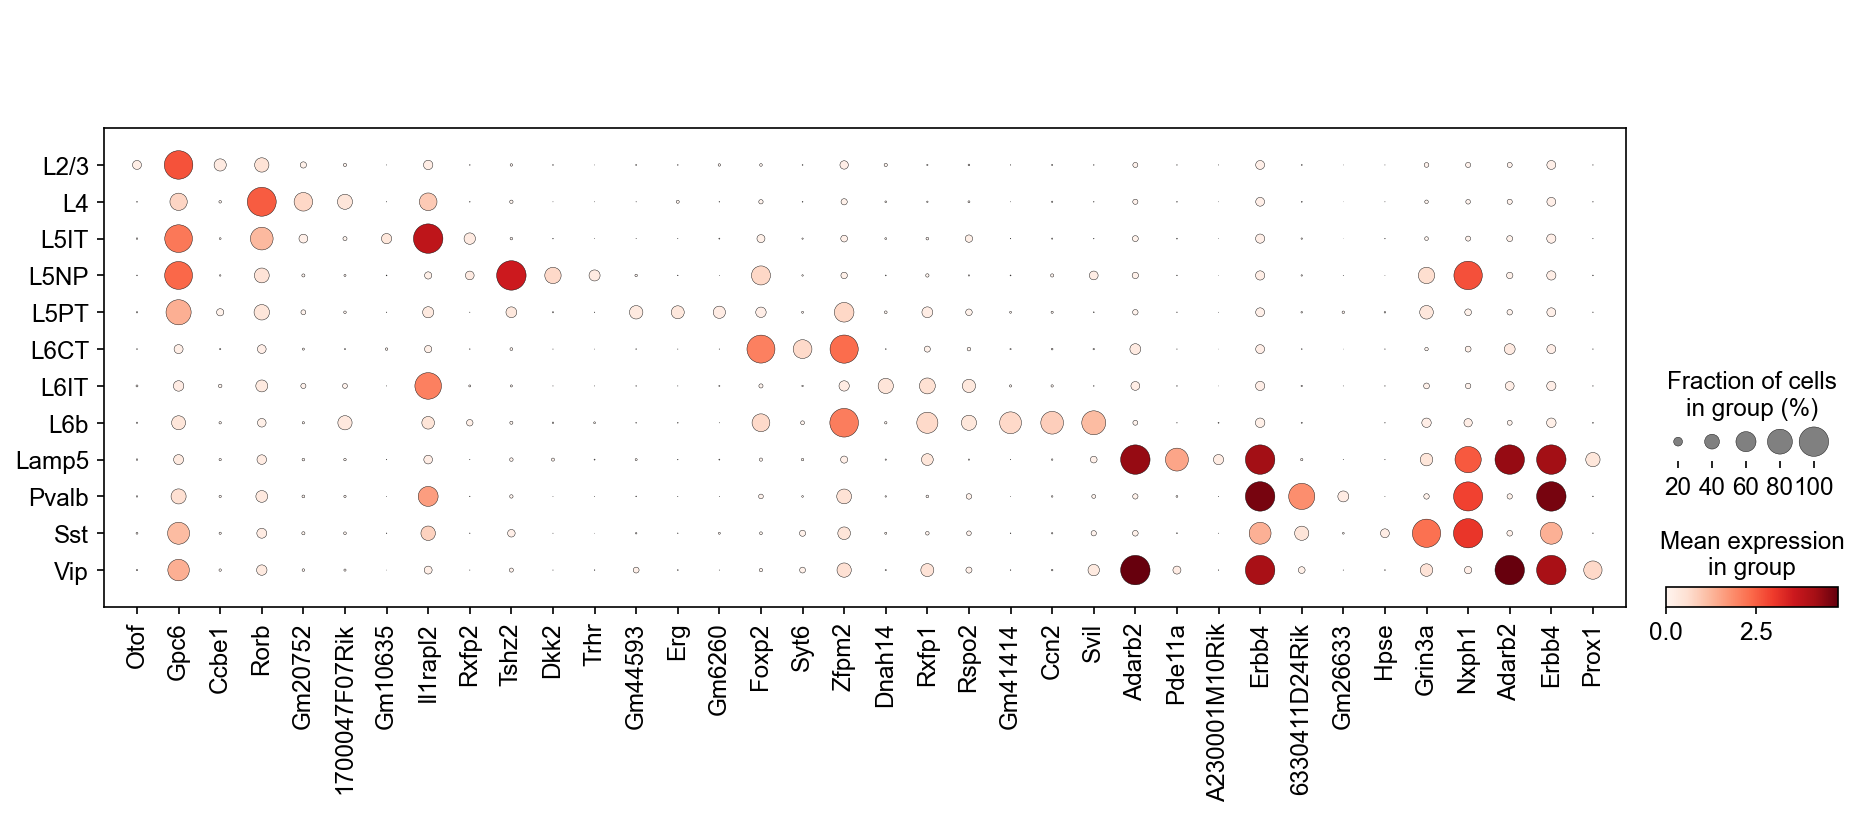

In [16]:
sc.pl.dotplot(adata, var_names=marks, groupby='Subclass')

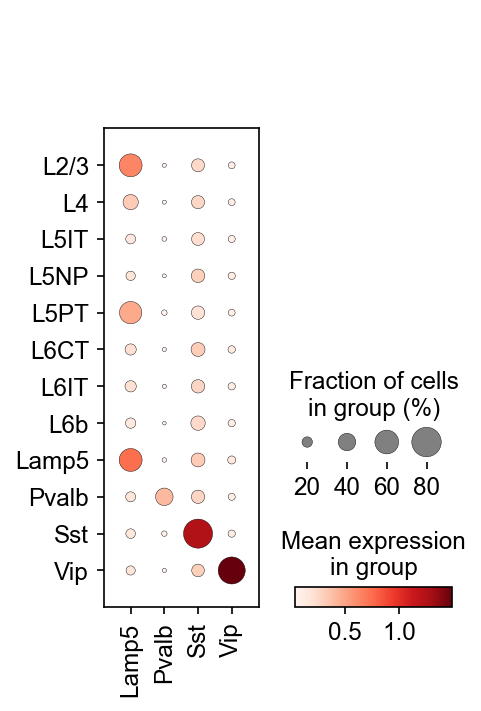

In [17]:
sc.pl.dotplot(adata, var_names=['Lamp5', 'Pvalb', 'Sst', 'Vip'], groupby='Subclass')

In [99]:
glut_obj = adata[adata.obs.Class=='Glutamatergic',:]

In [100]:
glut_obj.obs.Subclass.value_counts()

L2/3    23605
L4      22561
L6CT     8083
L6IT     6726
L5IT     3569
L5PT     2969
L5NP     1723
L6b       362
Name: Subclass, dtype: int64

In [114]:
objs_sub = []
#for i in ['L4', 'L2/3', 'L6CT', 'L6IT', 'L5IT', 'L5PT', ]:
for i in glut_obj.obs.Subclass.value_counts().index:
    obj = glut_obj[glut_obj.obs.Subclass==i]
    
    if(i=='L6b'):
        sc.pp.subsample(obj, n_obs=362)
        objs_sub.append(obj)
    else:
        sc.pp.subsample(obj, n_obs=500)
        objs_sub.append(obj)

glut_obj_sub = objs_sub[0].concatenate(objs_sub[1:])

/Users/salwanbutrus/opt/anaconda3/envs/xgb_env/lib/python3.7/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [133]:
glut_marks.remove('1700047F07Rik')

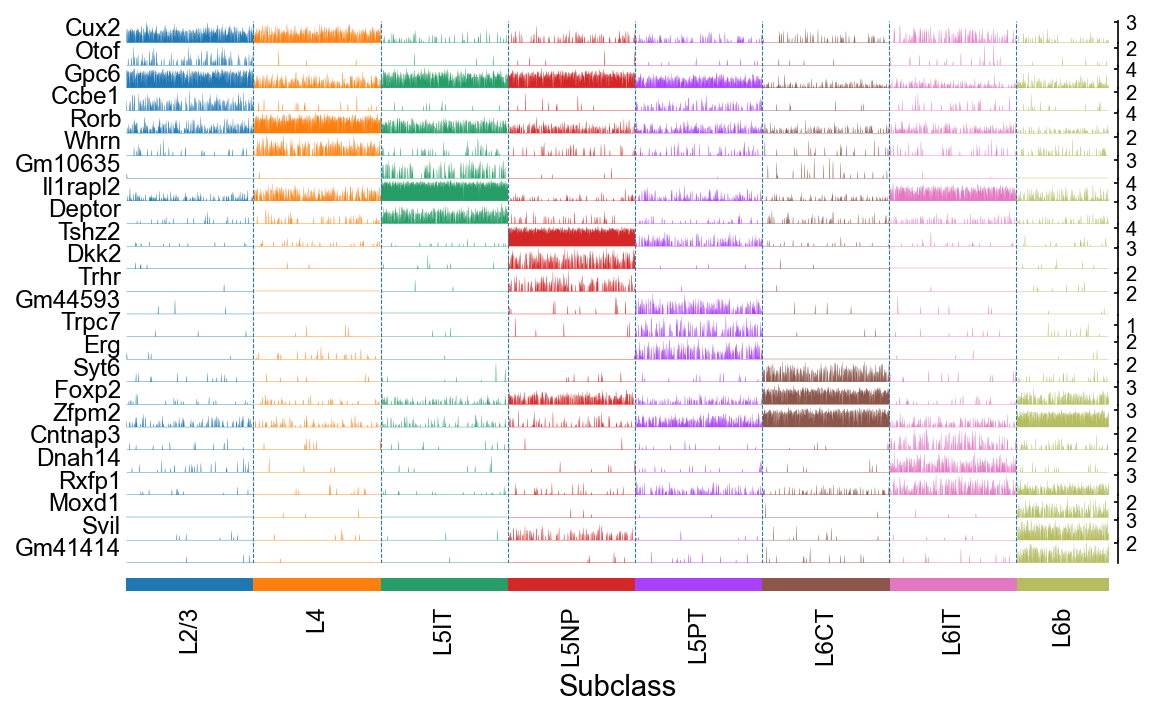

In [136]:
sc.pl.tracksplot(glut_obj_sub, var_names=['Cux2']+glut_marks, groupby='Subclass',
                swap_axes=True, figsize=(9,5))

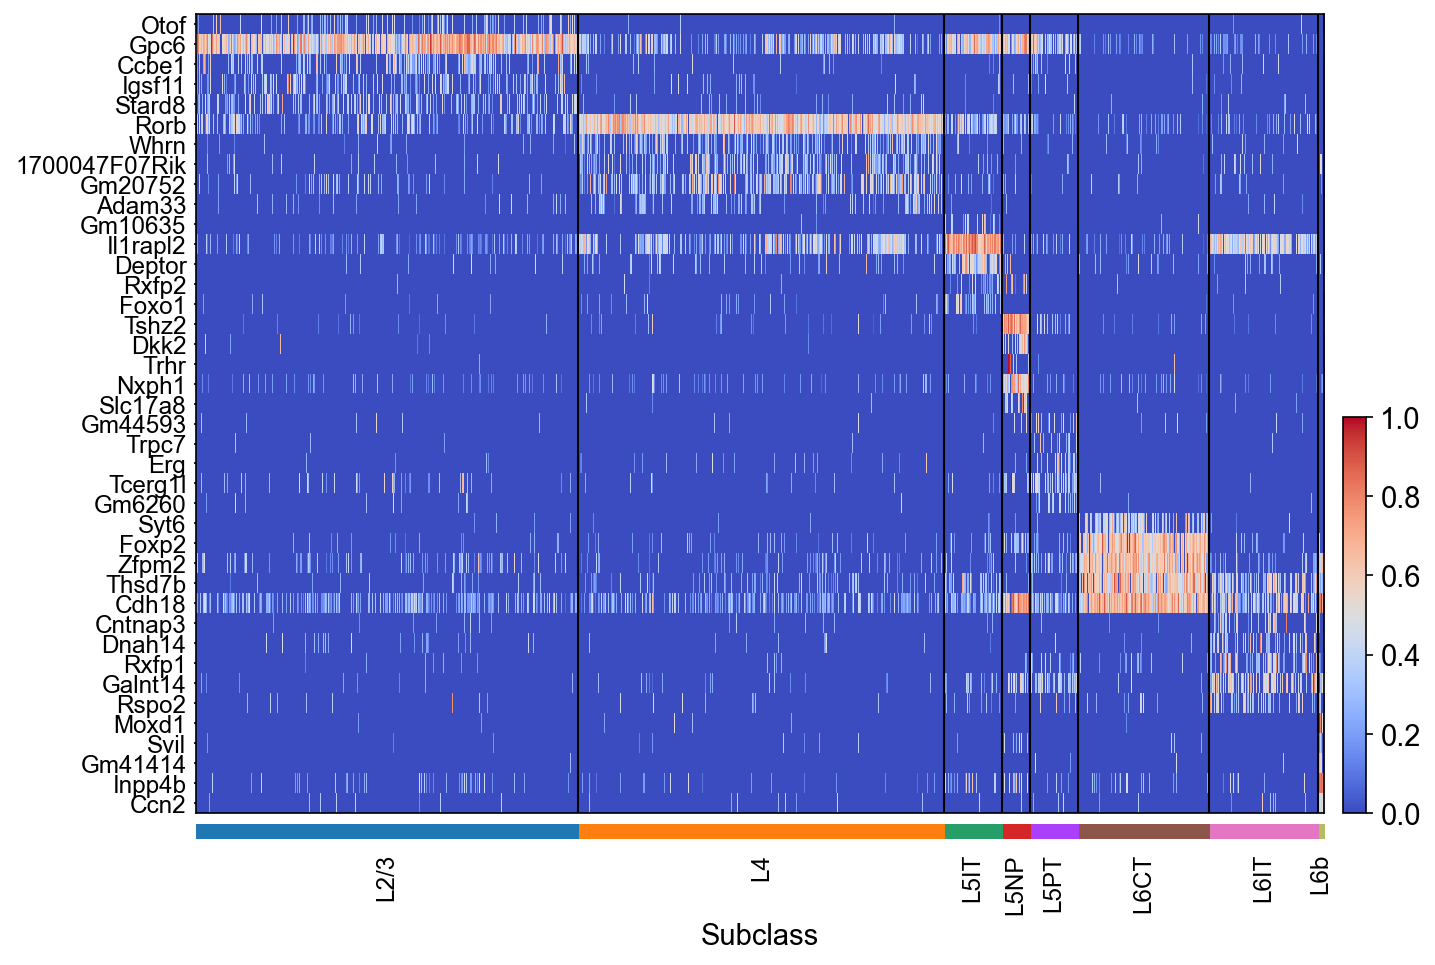

In [98]:
sc.pl.heatmap(adata[adata.obs.Class=='Glutamatergic',:], var_names=glut_marks, groupby='Subclass',
                swap_axes=True, use_raw=False, cmap='coolwarm', standard_scale='var')

In [ ]:
gaba_sub_markers = []
for i in ['Pvalb', 'Sst', 'Vip', 'Lamp5']:
    gaba_sub_markers.append(DE(adata=adata[adata.obs.Class=='gabaamatergic'], 
                               obs_id='Subclass', obs_id_test=i,ref='rest', pts_thresh=0.2, lf_thresh=1))
gaba_marks = []
for i in gaba_sub_markers:
    gaba_marks = gaba_marks + list(i.index[0:10])

In [3]:
adata = sc.read_h5ad('Figure1.h5ad')

In [5]:
adata.obs['Subclass']

GACCCAGCAGGAATAT-1-A1-11-0-GABAergic-P12              Pvalb
AAACGAAAGCTTCATG-1-A1-13-0-GABAergic-P12              Pvalb
AAACGAATCGATACGT-1-A1-13-0-GABAergic-P12              Pvalb
AAAGTCCCAGGAGACT-1-A1-13-0-GABAergic-P12              Pvalb
AACAAAGTCGCGCTGA-1-A1-13-0-GABAergic-P12              Pvalb
                                                      ...  
TGGGAAGAGATCGACG-1-C2-18-6-Glutamatergic-P22-10dWD      L6b
TGTTCCGGTATGTGTC-1-C2-18-6-Glutamatergic-P22-10dWD      L6b
TTCAATCCATCTCGTC-1-C2-18-6-Glutamatergic-P22-10dWD      L6b
TTCCTTCAGGGCATGT-1-C2-18-6-Glutamatergic-P22-10dWD      L6b
TTGACCCCACTGCGAC-1-C2-18-6-Glutamatergic-P22-10dWD      L6b
Name: Subclass, Length: 81462, dtype: category
Categories (12, object): ['L2/3', 'L4', 'L5IT', 'L5NP', ..., 'Lamp5', 'Pvalb', 'Sst', 'Vip']

### All subclasses

In [13]:
sub_markers = []
for i in adata.obs.Subclass.values.categories:
    sub_markers.append(DE(adata=adata, 
                               obs_id='Subclass', obs_id_test=i,ref='rest', pts_thresh=0.2, lf_thresh=1))
marks = []
for i in sub_markers:
    marks = marks + list(i.index[0:10])

cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level
cutoffs are good at 1.5 FC level


In [15]:
marks = []
for i in sub_markers:
    marks = marks + list(i.index[0:3])

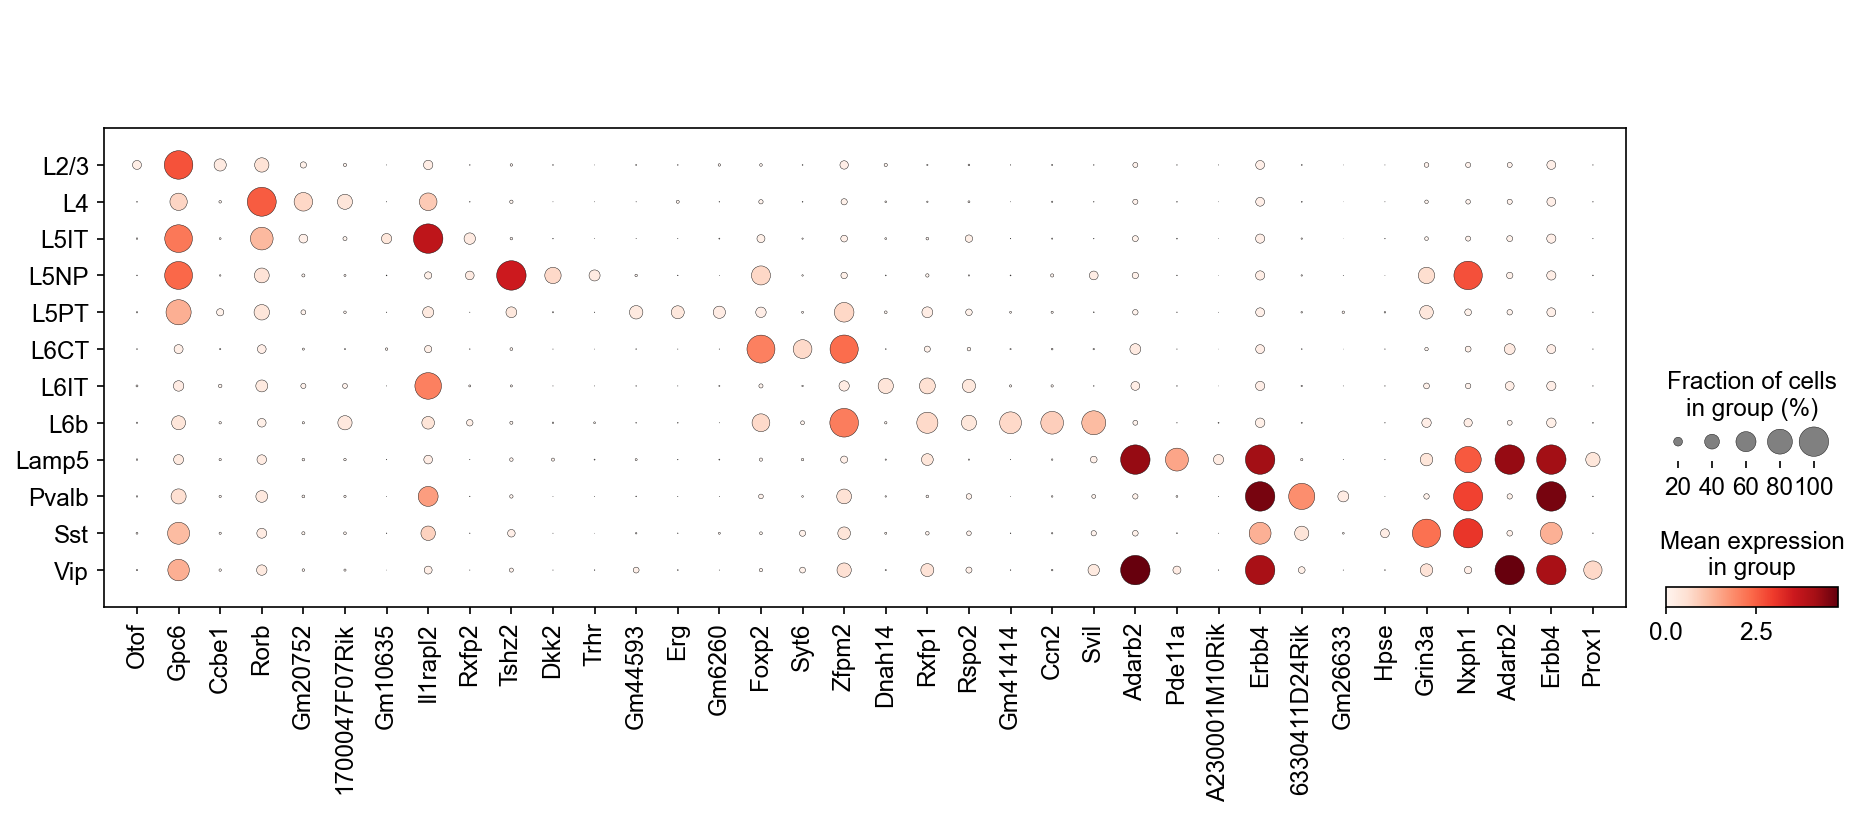

In [16]:
sc.pl.dotplot(adata, var_names=marks, groupby='Subclass')

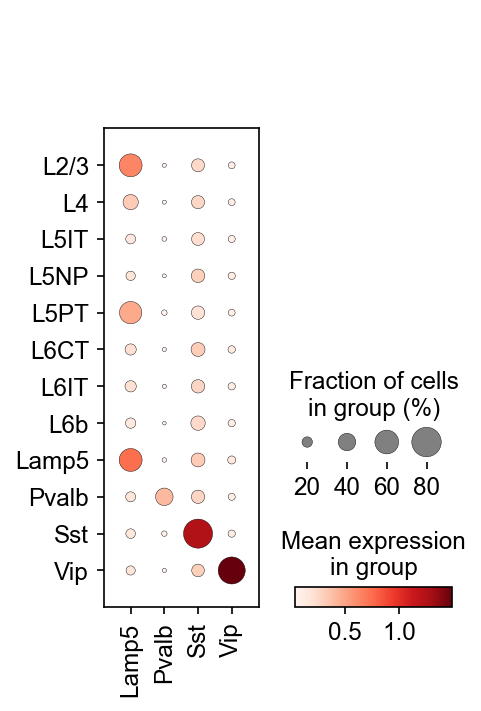

In [17]:
sc.pl.dotplot(adata, var_names=['Lamp5', 'Pvalb', 'Sst', 'Vip'], groupby='Subclass')

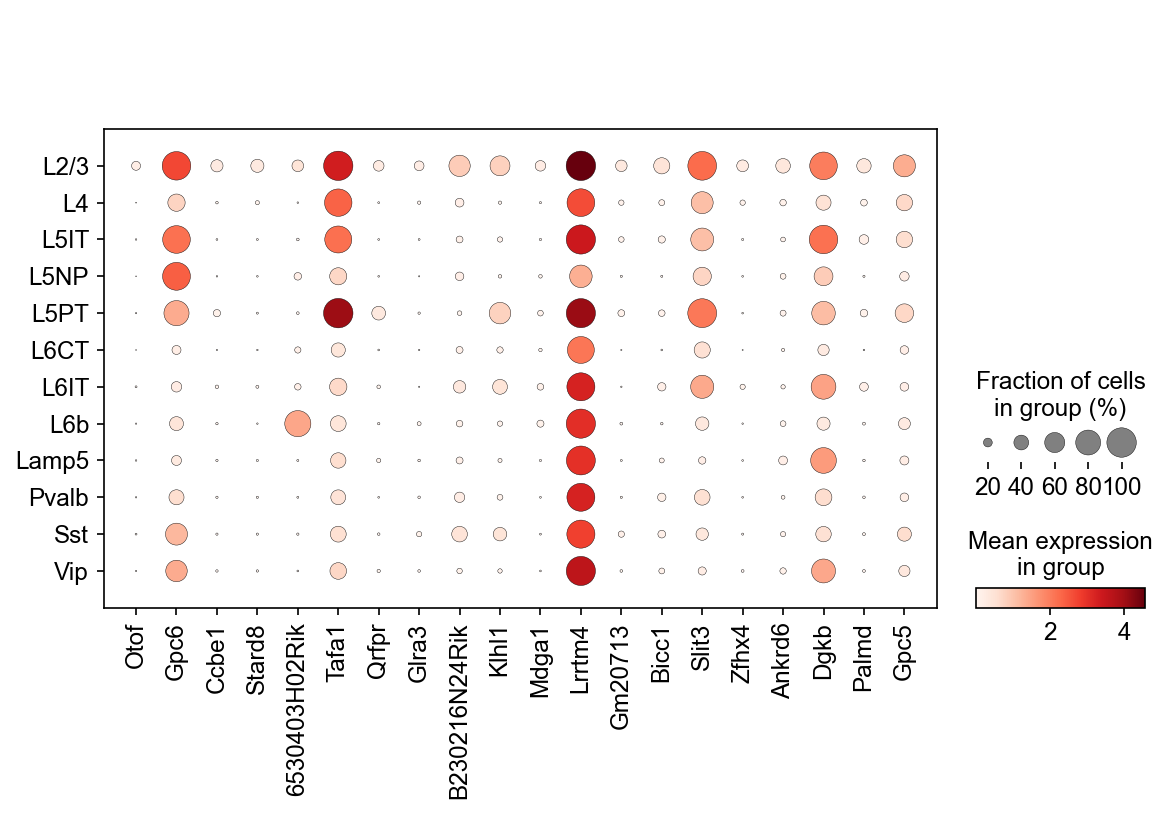

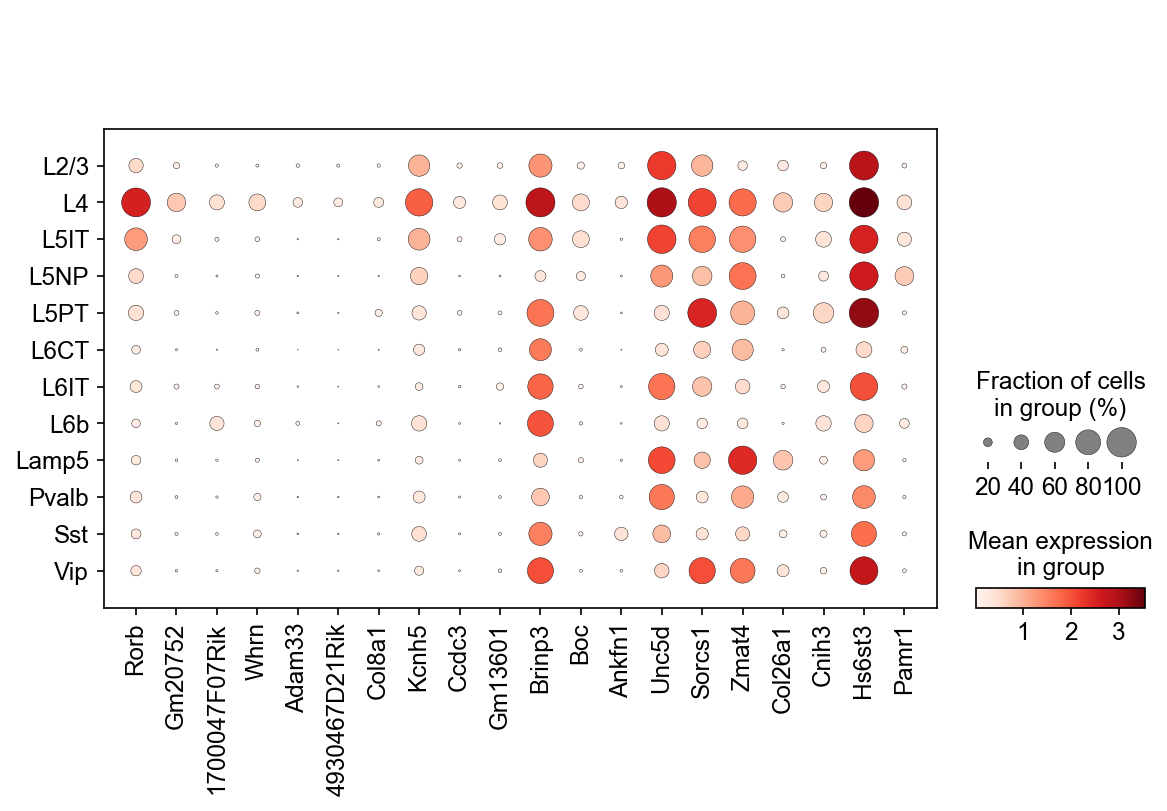

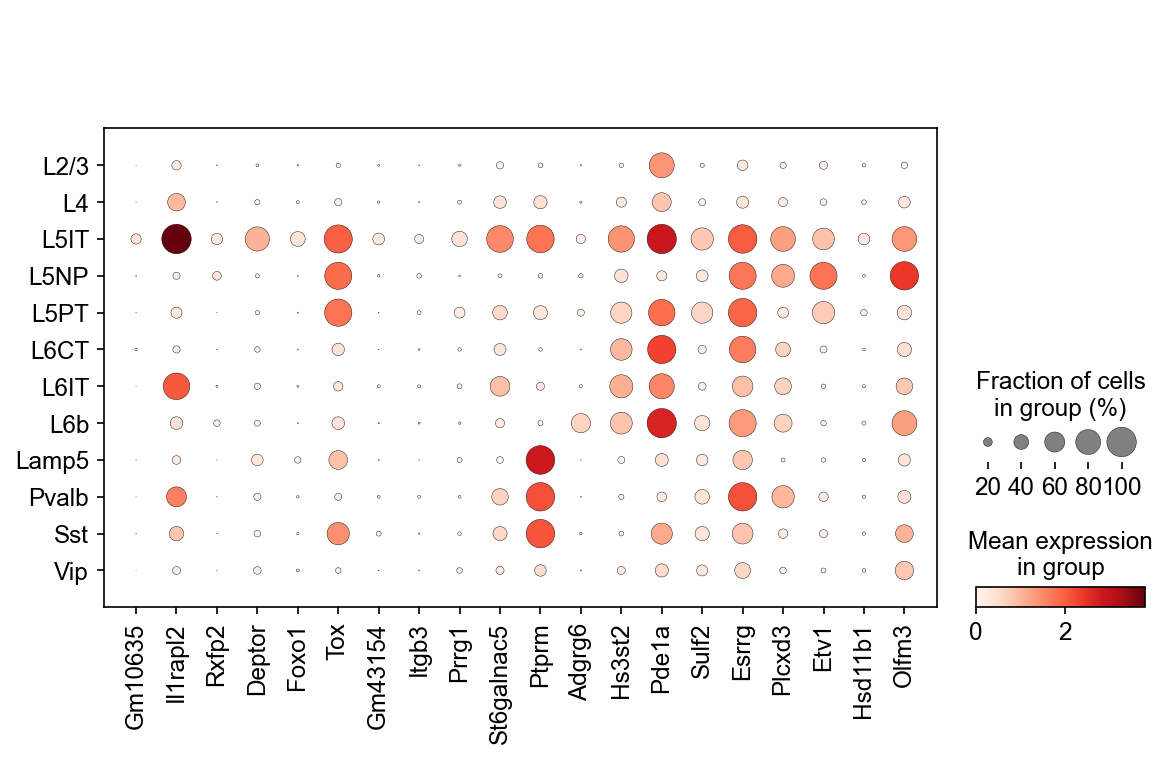

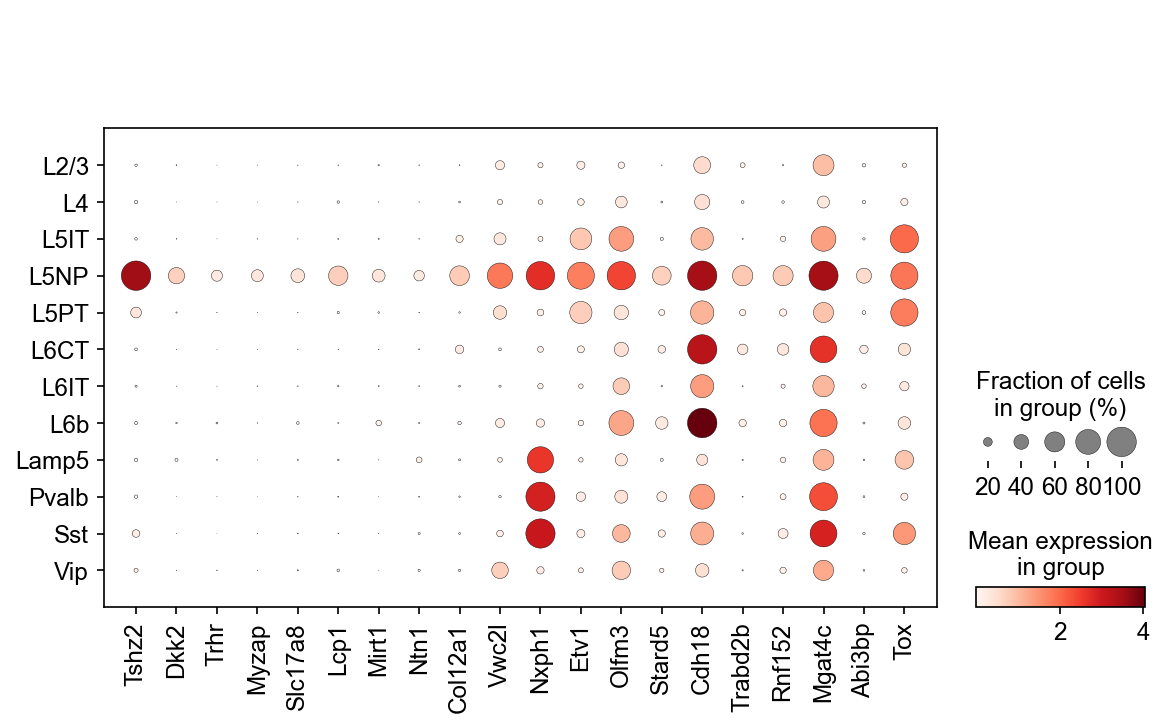

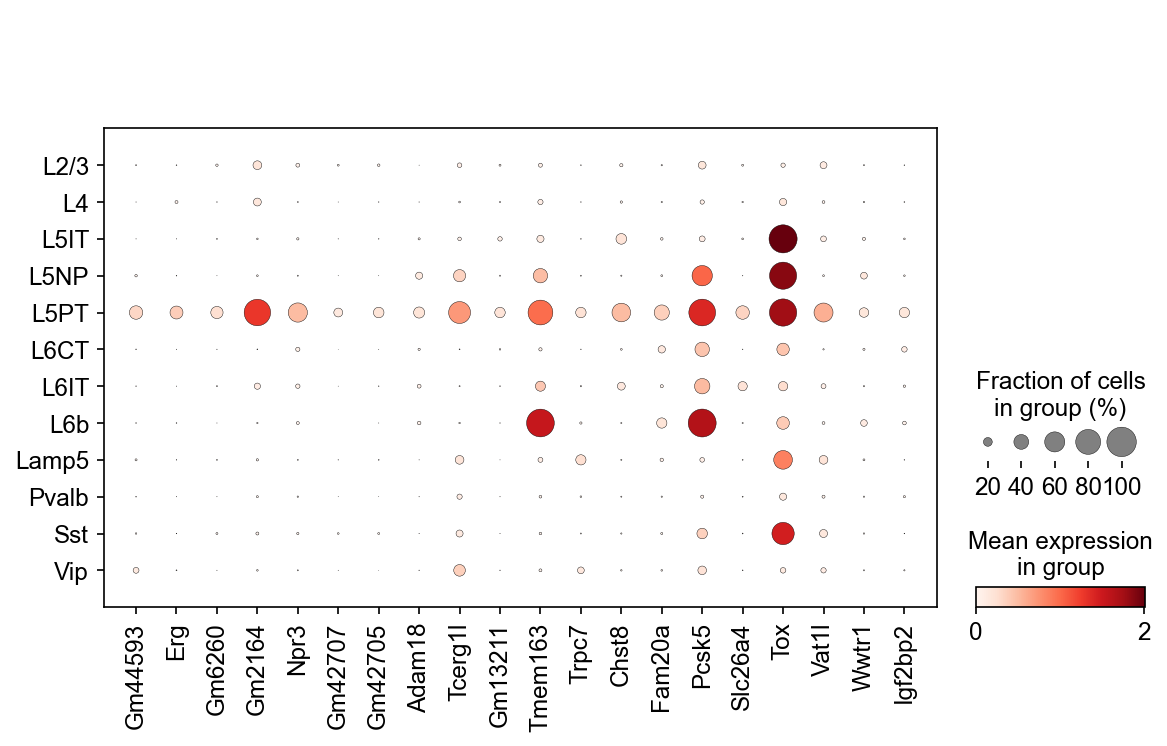

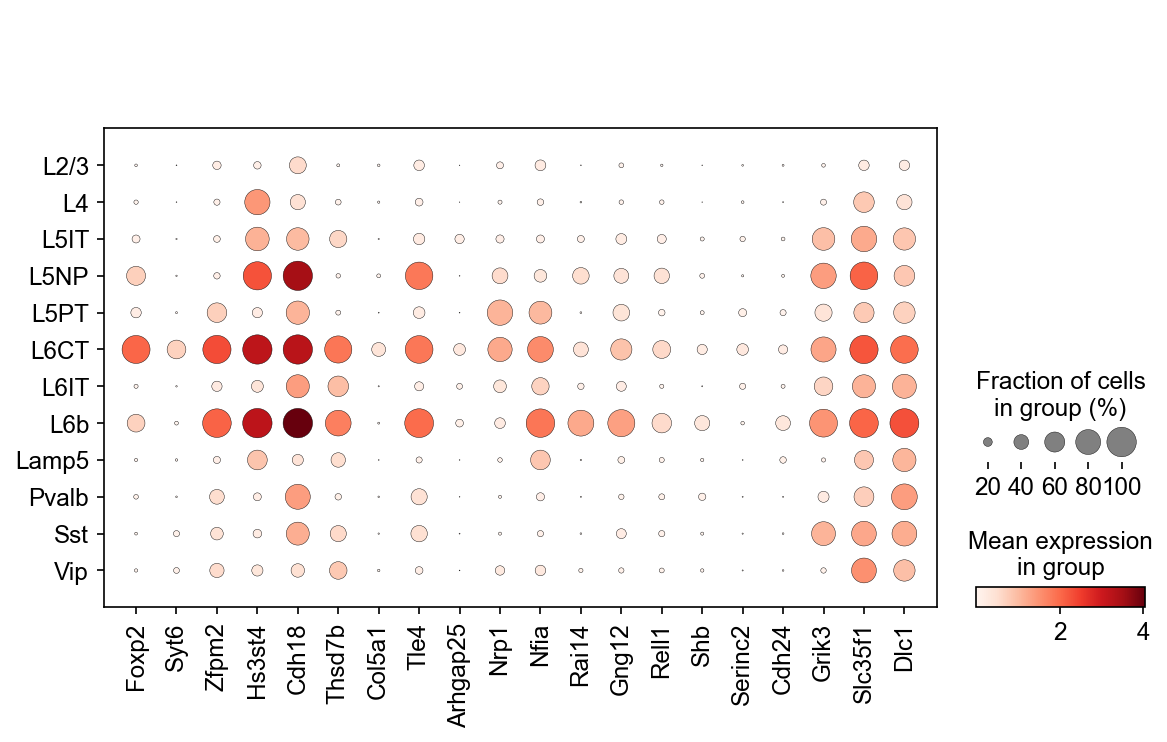

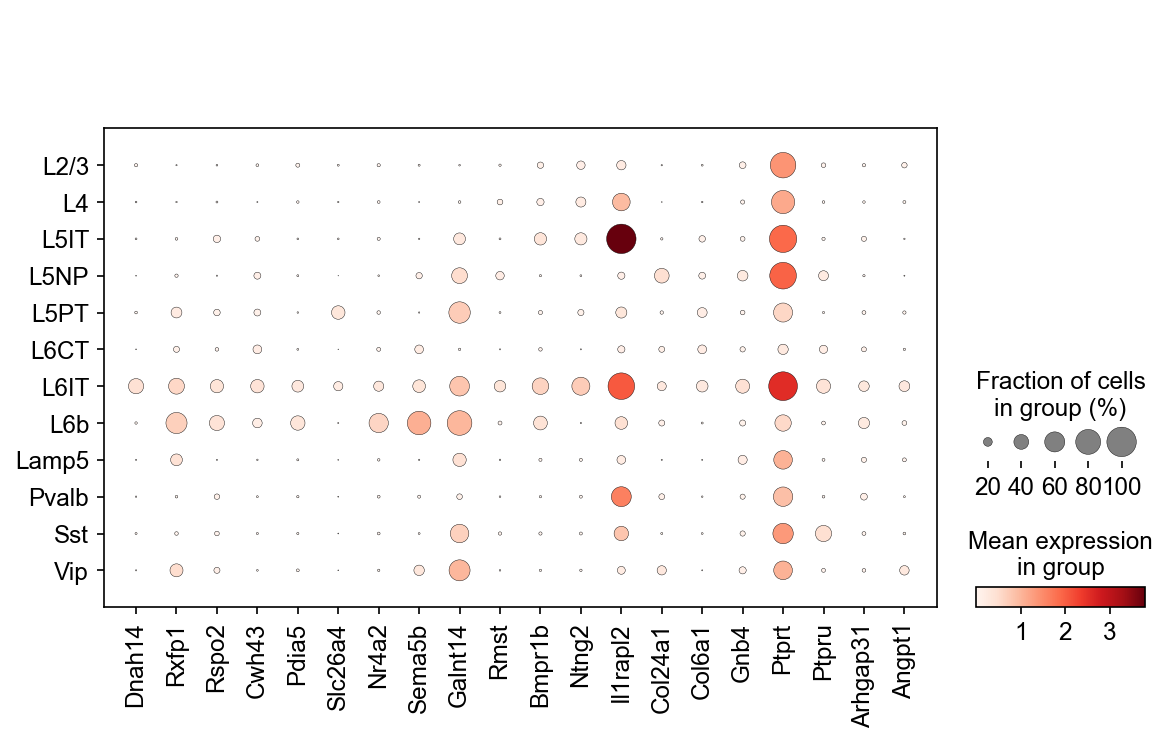

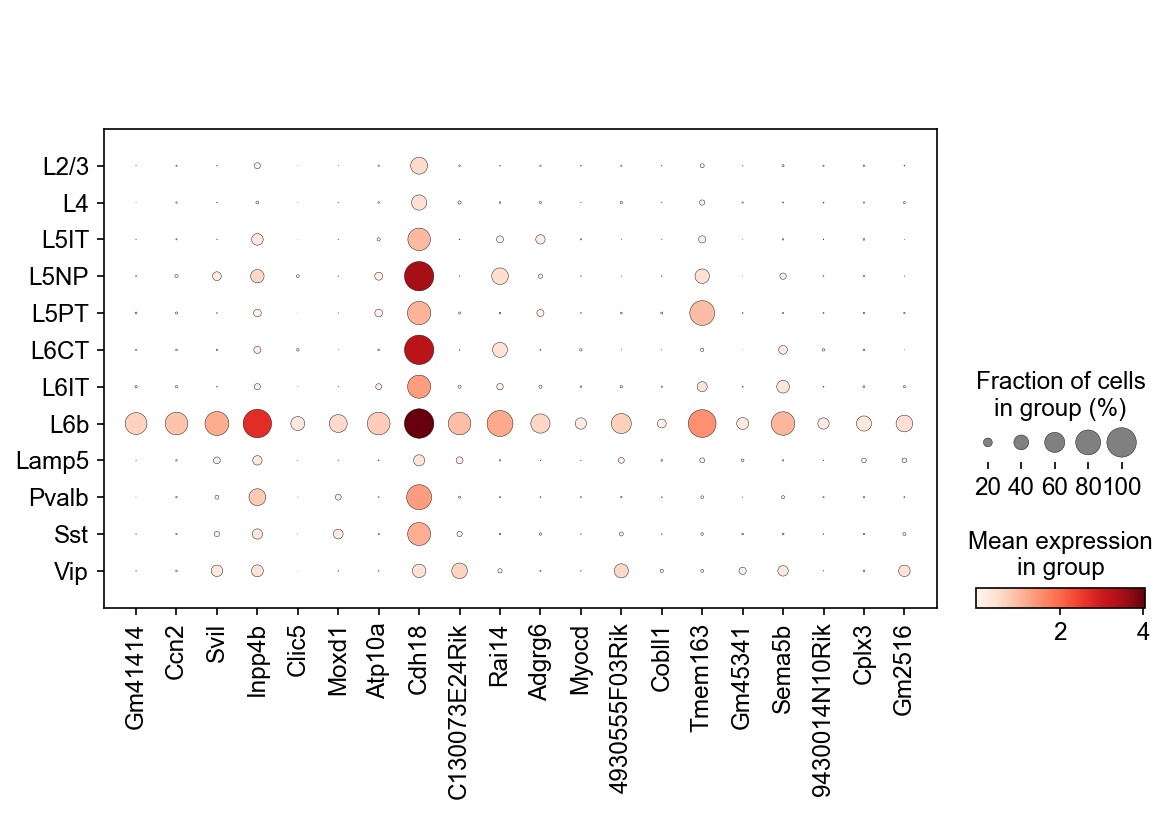

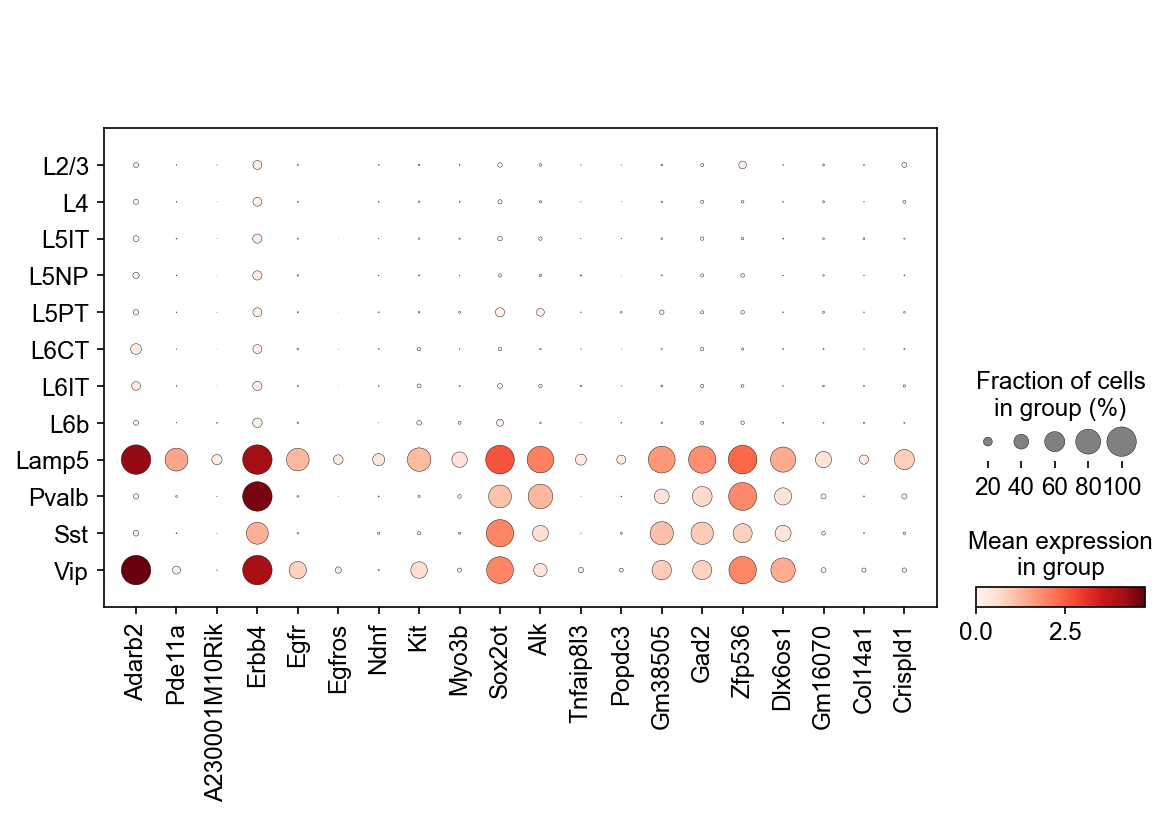

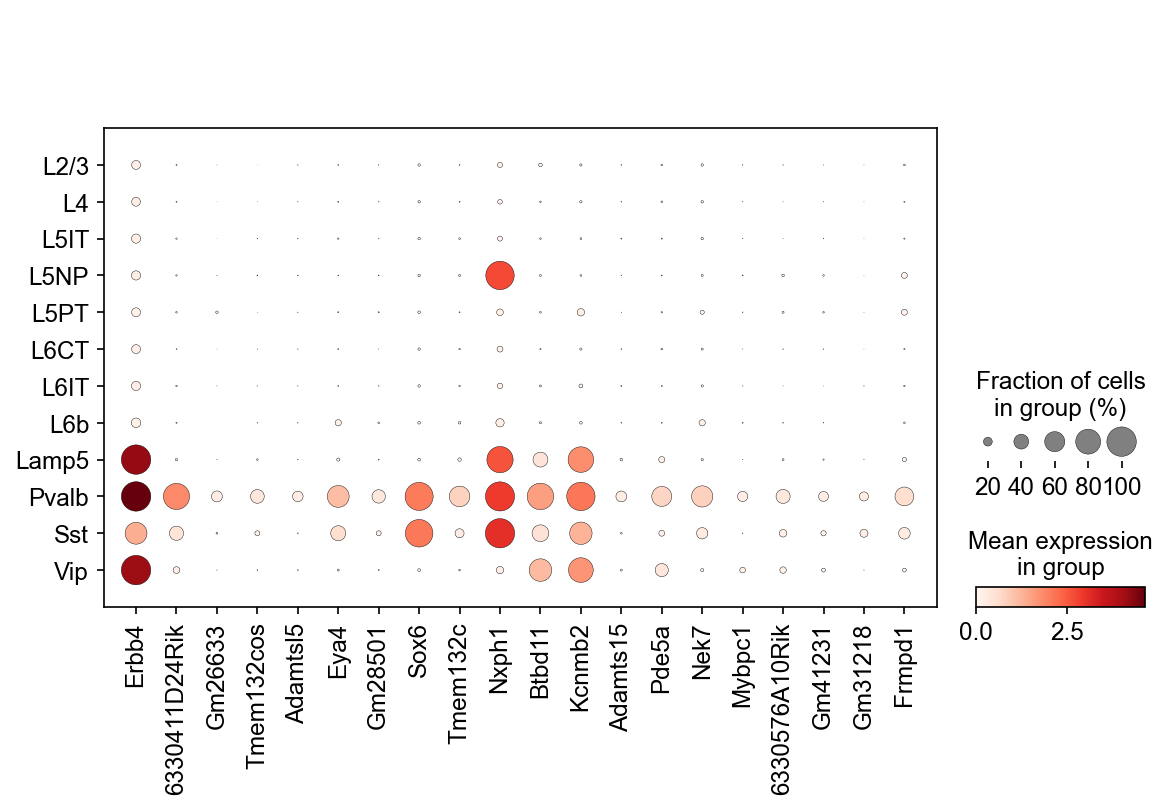

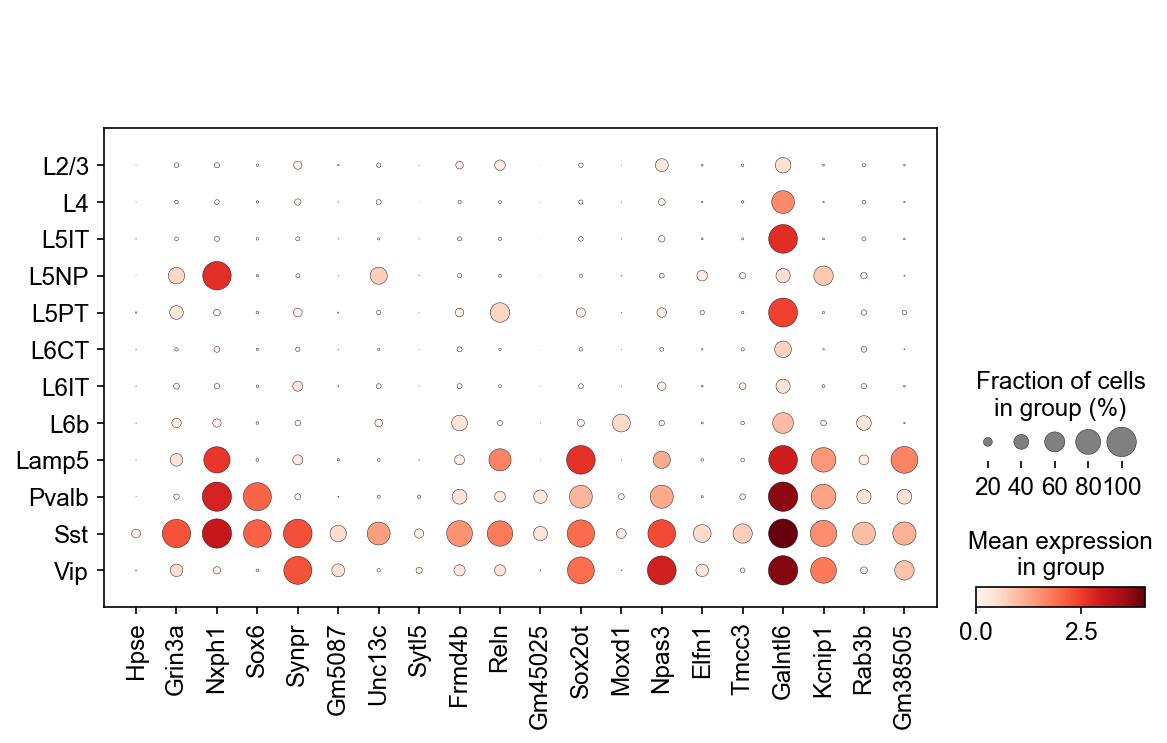

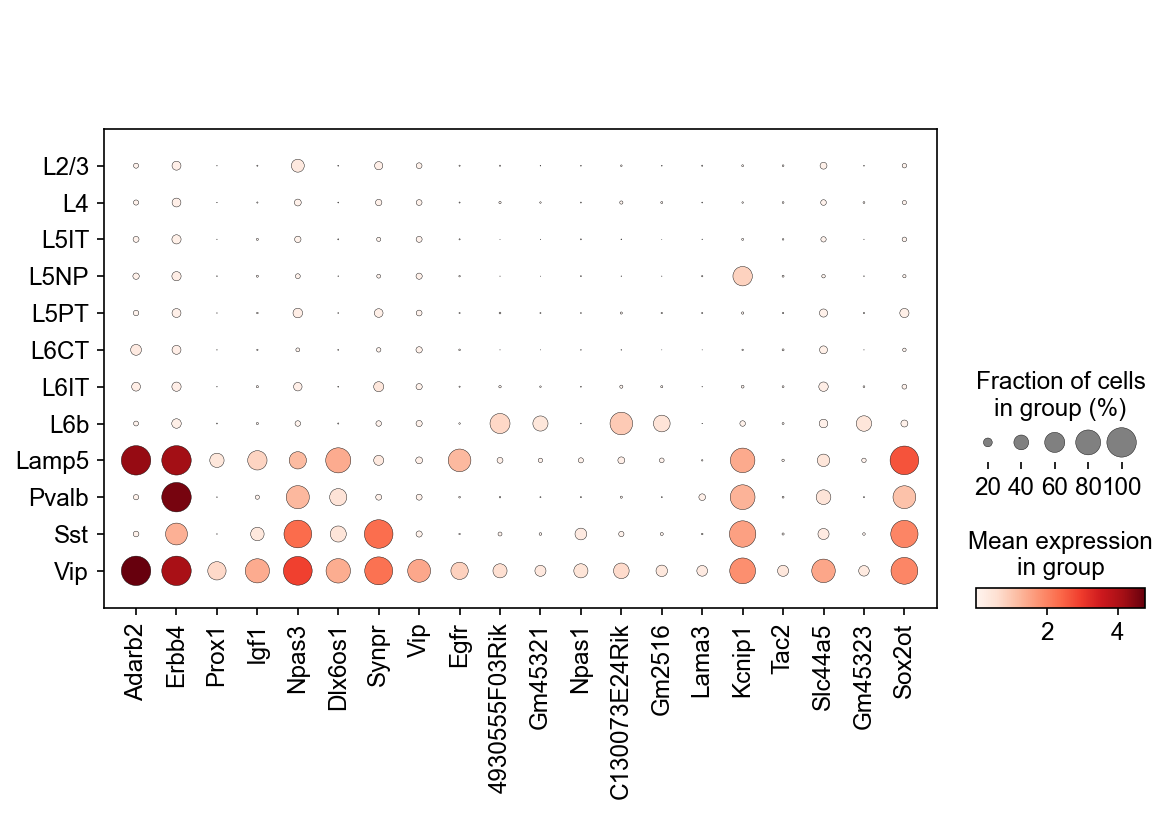

In [24]:
for i in sub_markers:
    sc.pl.dotplot(adata, var_names=i.index[0:20], groupby='Subclass')

In [6]:
objs_sub = []
#for i in ['L4', 'L2/3', 'L6CT', 'L6IT', 'L5IT', 'L5PT', ]:
for i in adata.obs.Subclass.value_counts().index:
    obj = adata[adata.obs.Subclass==i]
    
    if(i=='L6b'):
        sc.pp.subsample(obj, n_obs=362)
        objs_sub.append(obj)
    else:
        sc.pp.subsample(obj, n_obs=500)
        objs_sub.append(obj)

adata_sub = objs_sub[0].concatenate(objs_sub[1:])

/Users/salwanbutrus/opt/anaconda3/envs/xgb_env/lib/python3.7/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [7]:
adata.obs['Subclass'].values.categories

Index(['L2/3', 'L4', 'L5IT', 'L5NP', 'L5PT', 'L6CT', 'L6IT', 'L6b', 'Lamp5',
       'Pvalb', 'Sst', 'Vip'],
      dtype='object')

In [8]:
adata_sub.obs['Subclass'] = pd.Categorical(adata_sub.obs['Subclass']).reorder_categories(['L2/3', 'L4', 'L5IT', 'L5NP', 'L5PT', 
                                                 'L6CT', 'L6IT', 'L6b','Pvalb', 'Sst', 'Vip', 'Lamp5'])

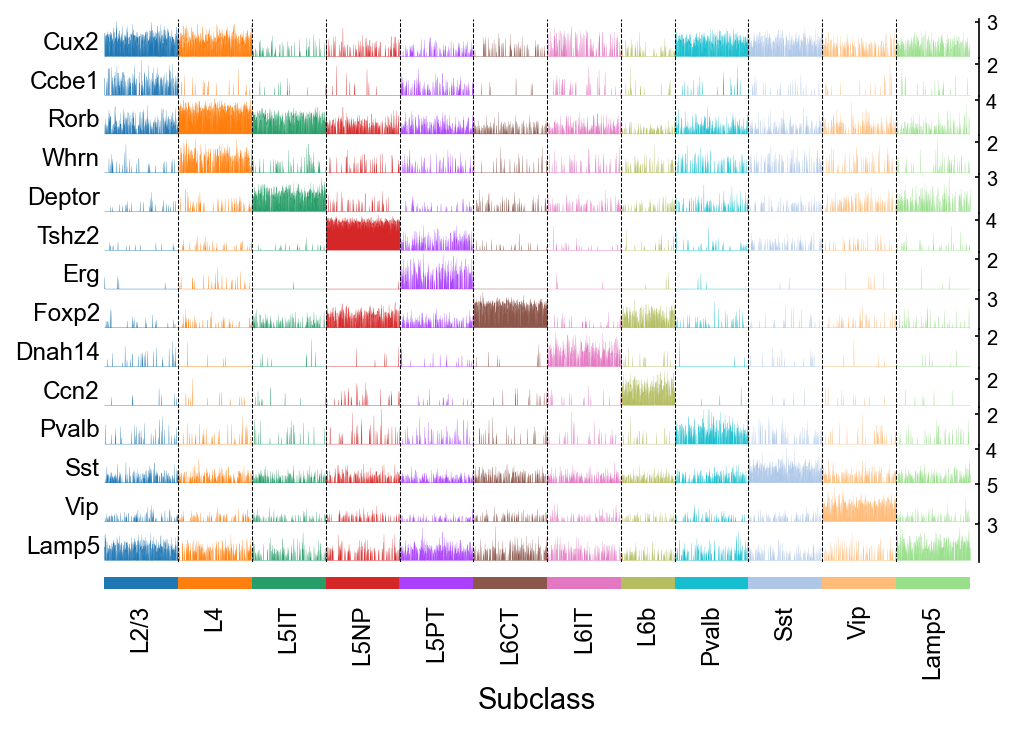

In [16]:
sc.pl.tracksplot(adata_sub, var_names=['Cux2','Ccbe1', 'Rorb', 'Whrn', 'Deptor',
                                         'Tshz2', 'Erg', 'Foxp2', 'Dnah14', 'Ccn2', 'Pvalb', 'Sst', 'Vip', 'Lamp5'], groupby='Subclass',
                swap_axes=True,figsize=(8,5), save='Fig1E.pdf')

In [15]:
sn.color_palette('Set2').as_hex()

['#66c2a5',
 '#fc8d62',
 '#8da0cb',
 '#e78ac3',
 '#a6d854',
 '#ffd92f',
 '#e5c494',
 '#b3b3b3']

## Final num cells bar plot

In [130]:
'Pre-mt ('+ str(adata_v0.shape[0])+' total cells)'

'Pre-mt (196117 total cells)'

In [131]:
#set up old version
#adata_v0 = sc.read_h5ad('h5ads/All-S1_v0.h5ad')

cts_df = pd.DataFrame(adata_v0.obs['Sample'].value_counts())
cts_df['Filter'] = ['Pre-mt ('+ str(adata_v0.shape[0])+' total cells)']*cts_df.shape[0]
cts_df['Num Cells'] = cts_df['Sample']
cts_df['Sample'] = cts_df.index
cts_df_v0 = cts_df
del cts_df

#adata_v1 = sc.read_h5ad('h5ads/All-S1_v1.h5ad')

cts_df = pd.DataFrame(adata_v1.obs['Sample'].value_counts())
cts_df['Filter'] = ['Post-mt ('+ str(adata_v1.shape[0])+' total cells)']*cts_df.shape[0]
cts_df['Num Cells'] = cts_df['Sample']
cts_df['Sample'] = cts_df.index
cts_df_v1 = cts_df
del cts_df

#adata = sc.read_h5ad('h5ads/All-S1_v5.h5ad')

cts_df = pd.DataFrame(adata.obs['Sample'].value_counts())
cts_df['Filter'] = ['Post-mapping ('+ str(adata.shape[0])+' total cells)']*cts_df.shape[0]
cts_df['Num Cells'] = cts_df['Sample']
cts_df['Sample'] = cts_df.index
cts_df_v4 = cts_df
del cts_df

In [3]:
FF = sc.read_h5ad('h5ads_cmprsd/FF_analyzed.h5ad')
P12 = sc.read_h5ad('h5ads_cmprsd/P12_analyzed.h5ad')
sham = sc.read_h5ad('h5ads_cmprsd/sham_S1S2S3B2_analyzed.h5ad')
depr = sc.read_h5ad('h5ads_cmprsd/1d-WD_analyzed.h5ad')

In [4]:
adata_filt = FF.concatenate(P12, sham, depr, batch_categories=['C1+C2', 'A1+A2', 
                                                               'S1+S2+S3+B2', 'D1+D2+D2new+D3',])

/Users/salwanbutrus/opt/anaconda3/envs/xgb_env/lib/python3.7/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [5]:
adata0 = sc.read_h5ad('h5ads/All-S1_raw.h5ad')
adata1 = sc.read_h5ad('h5ads_cmprsd/All-S1_v0.h5ad')
adata2 = sc.read_h5ad('h5ads_cmprsd/All-S1_v1.h5ad') 
adata3 = sc.read_h5ad('h5ads_cmprsd/All-S1_v4.h5ad') 

adata0.shape, adata1.shape, adata2.shape, adata3.shape

((199524, 32285), (199074, 21258), (169674, 21258), (112233, 21258))

In [7]:
adata_filt.shape

(111299, 21258)

In [17]:
adata0.obs['Sample'].values.categories

Index(['S1', 'S2', 'D1', 'D2', 'A1', 'A2', 'B2', 'C1', 'C2', 'D2new', 'D3',
       'S3'],
      dtype='object')

In [18]:
adata1.obs['Sample'].values.categories

Index(['S1', 'S2', 'D1', 'D2', 'A1', 'A2', 'B2', 'C1', 'C2', 'D2new', 'D3',
       'S3'],
      dtype='object')

In [19]:
adata2.obs['Sample'].values.categories

Index(['S1', 'S2', 'D1', 'D2', 'A1', 'A2', 'B2', 'C1', 'C2', 'D2new', 'D3',
       'S3'],
      dtype='object')

In [24]:
adata0.obs['Sample_renamed'] = adata0.obs['Sample'].cat.rename_categories(['S1', 'S2', 'D1', 'D2', 'A1', 'A2', 'S4', 
                                            'C1', 'C2', 'D4', 'D3','S3'])
adata1.obs['Sample_renamed'] = adata1.obs['Sample'].cat.rename_categories(['S1', 'S2', 'D1', 'D2', 'A1', 'A2', 'S4', 
                                            'C1', 'C2', 'D4', 'D3','S3'])
adata2.obs['Sample_renamed'] = adata2.obs['Sample'].cat.rename_categories(['S1', 'S2', 'D1', 'D2', 'A1', 'A2', 'S4', 
                                            'C1', 'C2', 'D4', 'D3','S3'])

In [20]:
adata3.obs['Sample'].values.categories

Index(['A1', 'A2', 'B2', 'C1', 'C2', 'D1', 'D2', 'D2new', 'D3', 'S1', 'S2',
       'S3'],
      dtype='object')

In [23]:
pd.Categorical(adata_filt.obs['Sample']).categories

Index(['A1', 'A2', 'B2', 'C1', 'C2', 'D1', 'D2', 'D2new', 'D3', 'S1', 'S2',
       'S3'],
      dtype='object')

In [27]:
adata3.obs['Sample_renamed'] = adata3.obs['Sample'].cat.rename_categories(['A1', 'A2', 'S4', 'C1', 'C2', 'D1', 'D2', 
                                                                           'D4', 'D3', 'S1', 'S2','S3'])
adata_filt.obs['Sample_renamed'] = pd.Categorical(adata_filt.obs['Sample']).rename_categories(['A1', 'A2', 'S4', 'C1', 'C2', 'D1', 'D2', 
                                                                           'D4', 'D3', 'S1', 'S2','S3'])

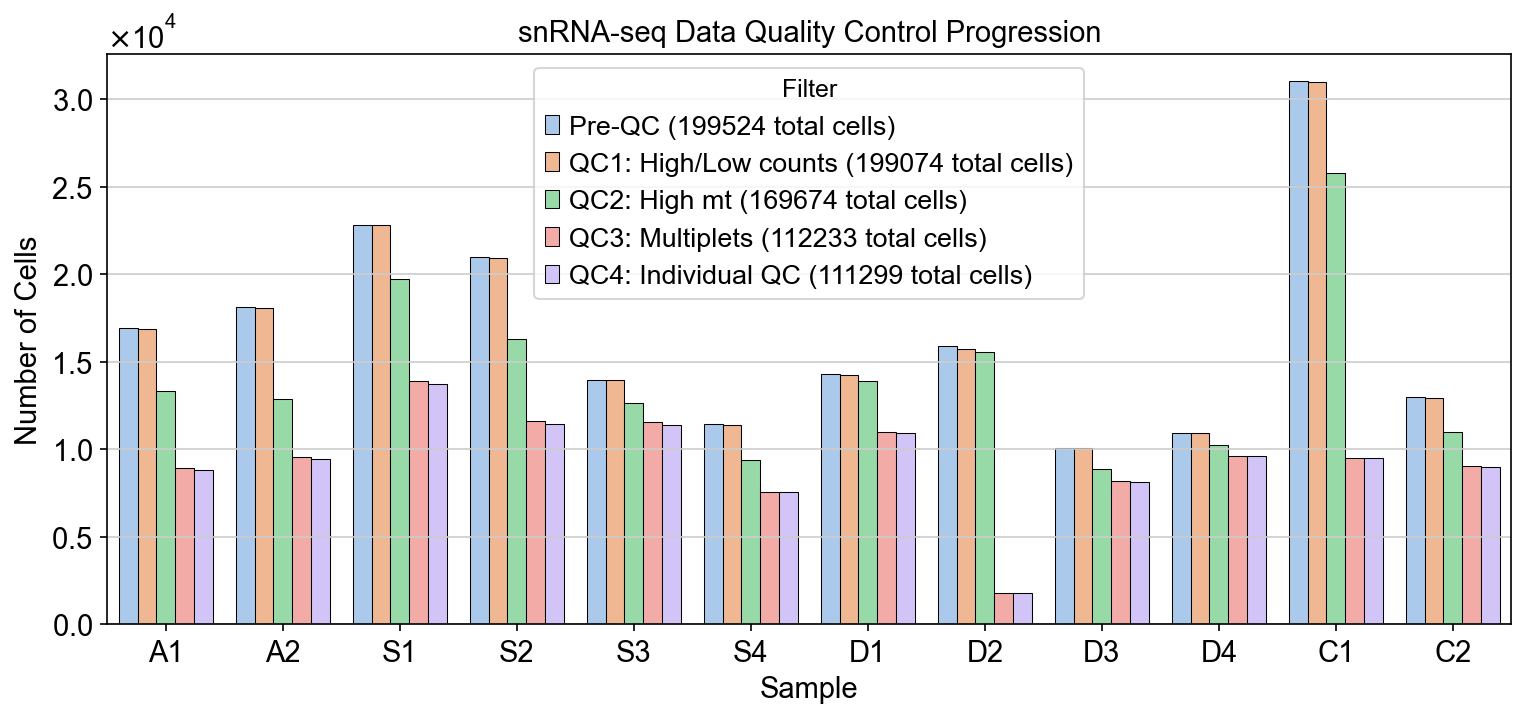

In [85]:
bar_dfs = []
for adata, label in zip([adata0, adata1, adata2, adata3, adata_filt], ['Pre-QC', 'QC1: High/Low counts', 'QC2: High mt', 
                                                                      'QC3: Multiplets', 'QC4: Individual QC']):
    adata_df = pd.DataFrame(adata.obs['Sample_renamed'].value_counts())
    adata_df['Filter'] = [label+' ('+ str(adata.shape[0])+' total cells)']*adata_df.shape[0]
    adata_df['Num Cells'] = adata_df['Sample_renamed']
    adata_df['Sample_renamed'] = adata_df.index
    bar_dfs.append(adata_df)

plt.figure(figsize=(12, 5))
ax = sn.barplot(data=pd.concat(bar_dfs), x='Sample_renamed', y='Num Cells', hue='Filter', 
                order=['A1', 'A2', 'S1', 'S2', 'S3', 'S4', 'D1', 'D2', 'D3', 'D4', 'C1', 'C2'],
                palette='pastel', linewidth=0.5, edgecolor='black')

plt.xticks(rotation=0)
plt.xlabel('Sample')
plt.ylabel('Number of Cells')
plt.title('snRNA-seq Data Quality Control Progression')

# Set the y-axis to scientific notation
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1, 1))  # Adjust this as needed

ax.yaxis.set_major_formatter(formatter)

plt.savefig('figures/FigS1_numcellsbarplot.pdf')
plt.show()

old version hidden below

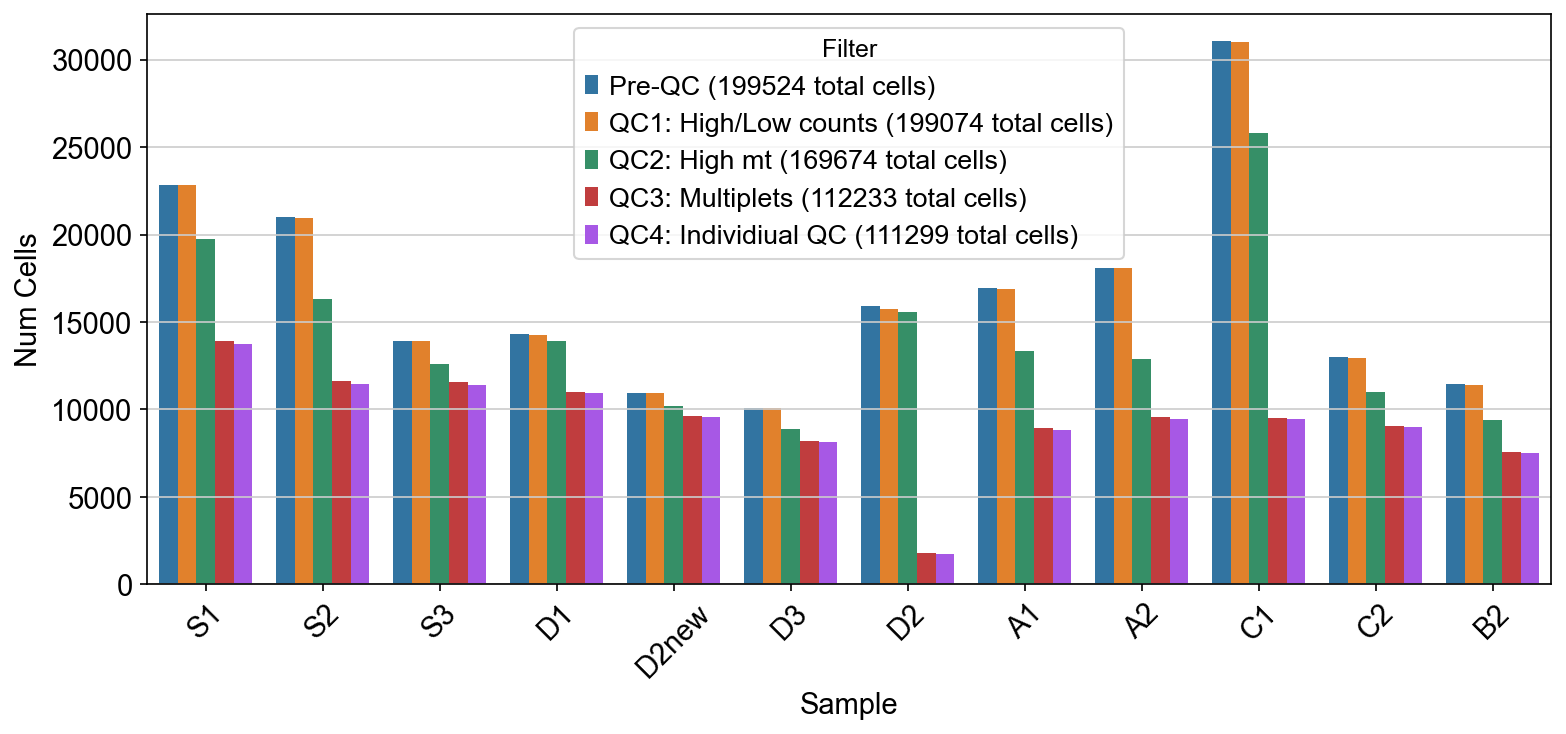

In [8]:
bar_dfs = []
for adata,label in zip([adata0, adata1, adata2, adata3, adata_filt], ['Pre-QC', 'QC1: High/Low counts', 'QC2: High mt', 
                                                                      'QC3: Multiplets', 'QC4: Individiual QC']):
    adata_df = pd.DataFrame(adata.obs['Sample'].value_counts())
    adata_df['Filter'] = [label+' ('+ str(adata.shape[0])+' total cells)']*adata_df.shape[0]
    adata_df['Num Cells'] = adata_df['Sample']
    adata_df['Sample'] = adata_df.index
    bar_dfs.append(adata_df)


plt.figure(figsize=(12,5))
sn.barplot(data = pd.concat(bar_dfs), x='Sample', y='Num Cells', hue='Filter', 
          order = )
plt.xticks(rotation=45)


plt.show()

In [48]:
pd.concat(bar_dfs).to_csv('Figure1_dfs/FigS1_barplot.csv')

In [15]:
adata_filt.X = adata_filt.raw.X
del adata_filt.raw


In [17]:
adata_filt.obs['Sample_renamed'] = pd.Categorical(adata_filt.obs['Sample']).rename_categories(['A1', 'A2', 'S4', 'C1', 'C2', 'D1', 'D2', 
                                                                           'D4', 'D3', 'S1', 'S2','S3'])

In [20]:
adata_filt.write_h5ad('h5ads/All-S1_v6.h5ad')
adata_filt.write_h5ad('h5ads_cmprsd/All-S1_v6.h5ad')

## n_genes and n_counts

In [13]:
adata_filt.raw.X

<111299x21258 sparse matrix of type '<class 'numpy.float32'>'
	with 288741882 stored elements in Compressed Sparse Row format>

In [3]:
adata_filt = sc.read_h5ad('h5ads_cmprsd/All-S1_v6.h5ad')

In [6]:
from matplotlib.ticker import ScalarFormatter


In [22]:
adata_filt.obs['Sample_renamed'].values.categories

Index(['A1', 'A2', 'S4', 'C1', 'C2', 'D1', 'D2', 'D4', 'D3', 'S1', 'S2', 'S3'], dtype='object')

In [36]:
adata_filt.obs['total_counts'] = adata_filt.obs[['total_counts']].clip(upper=30000).values

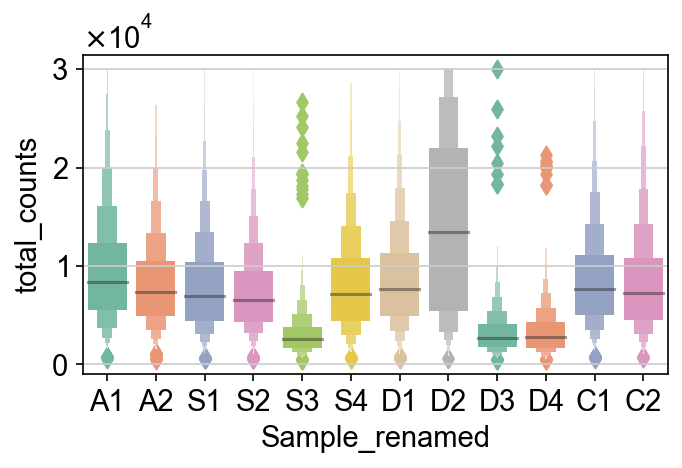

In [47]:
plt.figure(figsize=(5, 2.8))
ax = sn.boxenplot(data=adata_filt.obs, x='Sample_renamed', y='total_counts',
                  order=['A1', 'A2', 'S1', 'S2', 'S3', 'S4', 'D1', 'D2', 'D3', 'D4', 'C1', 'C2'],
                  palette='Set2', width=0.8,)

plt.xticks(rotation=0)

# Set the y-axis to scientific notation
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1, 1))  # Adjust this as needed

ax.yaxis.set_major_formatter(formatter)

plt.savefig('figures/FigS1_totcts.pdf', bbox_inches='tight')

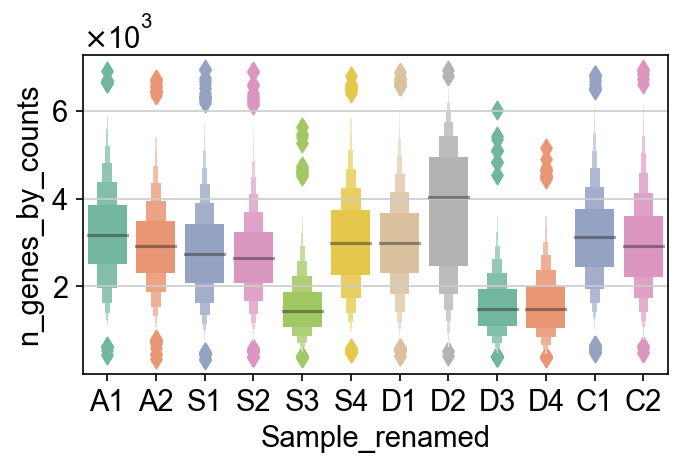

In [84]:
plt.figure(figsize=(5, 2.8))
ax = sn.boxenplot(data=adata_filt.obs, x='Sample_renamed', y='n_genes_by_counts',
                  order=['A1', 'A2', 'S1', 'S2', 'S3', 'S4', 'D1', 'D2', 'D3', 'D4', 'C1', 'C2'],
                  palette='Set2', width=0.8)

plt.xticks(rotation=0)

# Set the y-axis to scientific notation
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1, 1))  # Adjust this as needed

ax.yaxis.set_major_formatter(formatter)

plt.savefig('figures/FigS1_n_genes.pdf', bbox_inches='tight')